In [2]:
#@title Huggingface Login
#@markdown huggingface weight 를 이용하고 싶다면 로그인 필수
from google.colab import userdata
import os

os.environ["HF_WRITE_TOKEN"] = userdata.get("HF_WRITE_TOKEN")
os.environ["HUGGINGFACE_API_KEY"] = os.getenv("HF_WRITE_TOKEN")
os.environ["GOOGLE_API_KEY"] = userdata.get("GEMINI_KEY")
os.environ["GEMINI_API_KEY"] = userdata.get("GEMINI_KEY")
os.environ["SERPER_API_KEY"] = userdata.get('SERPER_KEY')
os.environ["SERP_API_KEY"] = userdata.get('SERP_API_KEY')
!huggingface-cli login --add-to-git-credential --token $HF_WRITE_TOKEN


Token is valid (permission: write).
The token `WriteToken` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.
Token has not been saved to git credential helper.
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `WriteToken`


In [1]:
%%capture
# @title Installation
!pip install "selenium>=4.25"
!pip install google-colab-selenium[undetected]
!apt-get update
# !apt-get install chromium
# !apt-get install chromium-browser
# !apt-get install chromium-driver
!apt-get install language-pack-ko
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

!pip install chromedriver-autoinstaller webdriver-manager

!locale-gen ko_KR.UTF-8

!sudo update-locale LANG=ko_KR.UTF-8 LC_MESSAGES=POSIX
!pip install browser-use@git+https://github.com/gregpr07/browser-use.git
# !pip install graphrag
!pip install --upgrade -I \
    duckduckgo-search \
    "langchain>=0.3.4"\
    langchain-community \
    langchain-google-genai \
    langchain-openai \
    langchain-huggingface \
    arxiv \
    xmltodict \
    youtube-transcript-api \
    pytube \
    bitsandbytes \
    "pyautogen>=0.2.29"\
    pytrends \
    hfautogen \
    "tensorflow-metadata>=1.13.1"
!pip install llama-index \
    llama-index-core \
    llama-index-legacy \
    llama-index-llms-openai\
    llama-index-embeddings-openai \
    llama-index-program-openai \
    llama-index-question-gen-openai \
    llama-index-agent-openai \
    llama-index-readers-file \
    llama-index-multi-modal-llms-openai
!pip install --upgrade "langchain>=0.3.4"
!pip install tokenizers --upgrade --no-deps --force-reinstall
!pip install crewai crewai-tools -I --upgrade
!pip install crewai crewai-tools -I --no-deps --upgrade --force-reinstall

## Crewai task procedure

In [ ]:
%%writefile setttings.yml
#@title searx setting.yml
general:
    debug : False # Debug mode, only for development
    instance_name : "searx" # displayed name
    contact_url: False # mailto:contact@example.com
    enable_stats: False # activate /stats page - note: it may leak usage data

brand:
    git_url: https://github.com/searx/searx
    git_branch: master
    issue_url: https://github.com/searx/searx/issues
    docs_url: https://searx.github.io/searx
    public_instances: https://searx.space
    wiki_url: https://github.com/searx/searx/wiki
    twitter_url: https://twitter.com/Searx_engine

search:
    safe_search : 0 # Filter results. 0: None, 1: Moderate, 2: Strict
    autocomplete : "" # Existing autocomplete backends: "dbpedia", "duckduckgo", "google", "startpage", "swisscows", "qwant", "wikipedia" - leave blank to turn it off by default
    default_lang : "" # Default search language - leave blank to detect from browser information or use codes from 'languages.py'
    ban_time_on_fail : 5 # ban time in seconds after engine errors
    max_ban_time_on_fail : 120 # max ban time in seconds after engine errors
    prefer_configured_language: False # increase weight of results in configured language in ranking

server:
    port : 8888
    bind_address : "127.0.0.1" # address to listen on
    secret_key : "d2dbc0d86f3eaf199aa8c38fae36e1fe89f8fdd5" # change this!
    base_url : False # Set custom base_url. Possible values: False or "https://your.custom.host/location/"
    image_proxy : False # Proxying image results through searx
    http_protocol_version : "1.0"  # 1.0 and 1.1 are supported
    method: "POST" # POST queries are more secure as they don't show up in history but may cause problems when using Firefox containers
    default_http_headers:
        X-Content-Type-Options : nosniff
        X-XSS-Protection : 1; mode=block
        X-Download-Options : noopen
        X-Robots-Tag : noindex, nofollow
        Referrer-Policy : no-referrer

ui:
    autofocus : True # Autofocus search input
    archive_today : False # show archive.today links
    static_path : "" # Custom static path - leave it blank if you didn't change
    templates_path : "" # Custom templates path - leave it blank if you didn't change
    default_theme : oscar # ui theme
    default_locale : "" # Default interface locale - leave blank to detect from browser information or use codes from the 'locales' config section
    theme_args :
        oscar_style : logicodev # default style of oscar
#   results_on_new_tab: False  # Open result links in a new tab by default
#   categories_order :
#     - general
#     - files
#     - map
#     - it
#     - science

# Lock arbitrary settings on the preferences page.
# To find the ID of the user setting you want to lock, check
# the ID of the form on the page "preferences".
#preferences:
#    lock:
#      - language
#      - autocomplete
#      - method

# searx supports result proxification using an external service: https://github.com/asciimoo/morty
# uncomment below section if you have running morty proxy
# the key is base64 encoded (keep the !!binary notation)
# Note: since commit af77ec3, morty accepts a base64 encoded key.
#result_proxy:
#    url : http://127.0.0.1:3000/
#    key : !!binary "your_morty_proxy_key"

outgoing: # communication with search engines
    request_timeout : 2.0 # default timeout in seconds, can be override by engine
    # max_request_timeout: 10.0 # the maximum timeout in seconds
    useragent_suffix : "" # suffix of searx_useragent, could contain information like an email address to the administrator
    pool_connections : 100 # Number of different hosts
    pool_maxsize : 10 # Number of simultaneous requests by host
# uncomment below section if you want to use a proxy
# see https://2.python-requests.org/en/latest/user/advanced/#proxies
# SOCKS proxies are also supported: see https://2.python-requests.org/en/latest/user/advanced/#socks
#    proxies:
#        http:
#            - http://proxy1:8080
#            - http://proxy2:8080
#        https:
#            - http://proxy1:8080
#            - http://proxy2:8080
#    using_tor_proxy : True
#    extra_proxy_timeout : 10.0 # Extra seconds to add in order to account for the time taken by the proxy
# uncomment below section only if you have more than one network interface
# which can be the source of outgoing search requests
#    source_ips:
#        - 1.1.1.1
#        - 1.1.1.2

# External plugin configuration
# See https://searx.github.io/searx/dev/plugins.html for more details
#
# plugins:
#   - plugin1
#   - plugin2
#   - ...

# uncomment below section if you want to configure which plugin is enabled by default
#
# enabled_plugins:
#   - "HTTPS rewrite"
#   - ...

# Example to rewrite hostnames in external links
#
# enabled_plugins:
#   - 'Hostname replace'
# hostname_replace:
#   '(.*\.)?youtube\.com$':           'invidious.example.com'
#   '(.*\.)?youtu\.be$':              'invidious.example.com'
#   '(.*\.)?youtube-noocookie\.com$': 'yotter.example.com'
#   '(.*\.)?reddit\.com$':            'teddit.example.com'
#   '(.*\.)?redd\.it$':               'teddit.example.com'
#   '(www\.)?twitter\.com$':          'nitter.example.com'

checker:
    # disable checker when in debug mode
    off_when_debug: True

    # scheduling: interval or int
    # use "scheduling: False" to disable scheduling
    # to activate the scheduler:
    # * uncomment "scheduling" section
    # * add "cache2 = name=searxcache,items=2000,blocks=2000,blocksize=4096,bitmap=1" to your uwsgi.ini

    # scheduling:
    #    start_after: [300, 1800]  # delay to start the first run of the checker
    #    every: [86400, 90000]  # how often the checker runs

    # additional tests: only for the YAML anchors (see the engines section)

    additional_tests:
      rosebud: &test_rosebud
        matrix:
          query: rosebud
          lang: en
        result_container:
          - not_empty
          - ['one_title_contains', 'citizen kane']
        test:
          - unique_results

      android: &test_android
        matrix:
          query: ['android']
          lang: ['en', 'de', 'fr', 'zh-CN']
        result_container:
          - not_empty
          - ['one_title_contains', 'google']
        test:
          - unique_results

    # tests: only for the YAML anchors (see the engines section)
    tests:
      infobox: &tests_infobox
        infobox:
          matrix:
            query: ["linux", "new york", "bbc"]
          result_container:
            - has_infobox

engines:
  - name: apk mirror
    engine: apkmirror
    timeout: 4.0
    shortcut: apkm
    disabled: True

# Requires Tor
  - name : ahmia
    engine : ahmia
    categories : onions
    enable_http : True
    shortcut : ah

  - name : arch linux wiki
    engine : archlinux
    shortcut : al

  - name : archive is
    engine : xpath
    search_url : https://archive.is/search/?q={query}
    url_xpath : (//div[@class="TEXT-BLOCK"]/a)/@href
    title_xpath : (//div[@class="TEXT-BLOCK"]/a)
    content_xpath : //div[@class="TEXT-BLOCK"]/ul/li
    categories : general
    timeout : 7.0
    disabled : True
    shortcut : ai
    soft_max_redirects: 1
    about:
      website: https://archive.is/
      wikidata_id: Q13515725
      official_api_documentation: https://mementoweb.org/depot/native/archiveis/
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : arxiv
    engine : arxiv
    shortcut : arx
    categories : science
    timeout : 4.0

#  tmp suspended:  dh key too small
#  - name : base
#    engine : base
#    shortcut : bs

  - name: bandcamp
    engine: bandcamp
    shortcut: bc
    categories: music

  - name : wikipedia
    engine : wikipedia
    shortcut : wp
    base_url : 'https://{language}.wikipedia.org/'

    #The fulltext and title parameter is necessary for Wikimini because sometimes it will not show the results and redirect instead
  - name: wikimini
    engine: xpath
    shortcut: wkmn
    search_url : https://fr.wikimini.org/w/index.php?search={query}&title=Sp%C3%A9cial%3ASearch&fulltext=Search
    url_xpath : //li/div[@class="mw-search-result-heading"]/a/@href
    title_xpath : //li//div[@class="mw-search-result-heading"]/a
    content_xpath : //li/div[@class="searchresult"]
    categories : general
    disabled : True
    about:
      website: https://wikimini.org/
      wikidata_id: Q3568032
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : bing
    engine : bing
    shortcut : bi

  - name : bing images
    engine : bing_images
    shortcut : bii

  - name : bing news
    engine : bing_news
    shortcut : bin

  - name : bing videos
    engine : bing_videos
    shortcut : biv

  - name : bitbucket
    engine : xpath
    paging : True
    search_url : https://bitbucket.org/repo/all/{pageno}?name={query}
    url_xpath : //article[@class="repo-summary"]//a[@class="repo-link"]/@href
    title_xpath : //article[@class="repo-summary"]//a[@class="repo-link"]
    content_xpath : //article[@class="repo-summary"]/p
    categories : it
    timeout : 4.0
    disabled : True
    shortcut : bb
    about:
      website: https://bitbucket.org/
      wikidata_id: Q2493781
      official_api_documentation: https://developer.atlassian.com/bitbucket
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : btdigg
    engine : btdigg
    shortcut : bt

  - name : ccc-tv
    engine : xpath
    paging : False
    search_url : https://media.ccc.de/search/?q={query}
    url_xpath : //div[@class="caption"]/h3/a/@href
    title_xpath : //div[@class="caption"]/h3/a/text()
    content_xpath : //div[@class="caption"]/h4/@title
    categories : videos
    disabled : True
    shortcut : c3tv
    about:
      website: https://media.ccc.de/
      wikidata_id: Q80729951
      official_api_documentation: https://github.com/voc/voctoweb
      use_official_api: false
      require_api_key: false
      results: HTML

  - name: openverse
    engine: openverse
    categories: images
    shortcut: opv

# - name : core.ac.uk
#   engine : core
#   categories : science
#   shortcut : cor
#   # get your API key from: https://core.ac.uk/api-keys/register/
#   api_key : 'unset'

  - name : crossref
    engine : json_engine
    paging : True
    search_url : https://search.crossref.org/dois?q={query}&page={pageno}
    url_query : doi
    title_query : title
    title_html_to_text: True
    content_query : fullCitation
    content_html_to_text: True
    categories : science
    shortcut : cr
    about:
      website: https://www.crossref.org/
      wikidata_id: Q5188229
      official_api_documentation: https://github.com/CrossRef/rest-api-doc
      use_official_api: false
      require_api_key: false
      results: JSON

  - name : currency
    engine : currency_convert
    categories : general
    shortcut : cc

  - name : deezer
    engine : deezer
    shortcut : dz

  - name : deviantart
    engine : deviantart
    shortcut : da
    timeout : 3.0

  - name : ddg definitions
    engine : duckduckgo_definitions
    shortcut : ddd
    weight : 2
    disabled : True
    tests: *tests_infobox

# cloudflare protected
#  - name : digbt
#    engine : digbt
#    shortcut : dbt
#    timeout : 6.0
#    disabled : True

  - name : digg
    engine : digg
    shortcut : dg

  - name : erowid
    engine : xpath
    paging : True
    first_page_num : 0
    page_size : 30
    search_url : https://www.erowid.org/search.php?q={query}&s={pageno}
    url_xpath : //dl[@class="results-list"]/dt[@class="result-title"]/a/@href
    title_xpath : //dl[@class="results-list"]/dt[@class="result-title"]/a/text()
    content_xpath : //dl[@class="results-list"]/dd[@class="result-details"]
    categories : general
    shortcut : ew
    disabled : True
    about:
      website: https://www.erowid.org/
      wikidata_id: Q1430691
      official_api_documentation:
      use_official_api: false
      require_api_key: false
      results: HTML

  - name: emojipedia
    engine: emojipedia
    timeout: 4.0
    shortcut: em
    disabled: True

#  - name : elasticsearch
#    shortcut : es
#    engine : elasticsearch
#    base_url : http://localhost:9200
#    username : elastic
#    password : changeme
#    index : my-index
#    # available options: match, simple_query_string, term, terms, custom
#    query_type : match
#    # if query_type is set to custom, provide your query here
#    #custom_query_json: {"query":{"match_all": {}}}
#    #show_metadata: False
#    disabled : True

  - name : wikidata
    engine : wikidata
    shortcut : wd
    timeout : 3.0
    weight : 2
    tests: *tests_infobox

  - name : duckduckgo
    engine : duckduckgo
    shortcut : ddg
    disabled : True

  - name : duckduckgo images
    engine : duckduckgo_images
    shortcut : ddi
    timeout: 3.0
    disabled : True

  - name : tineye
    engine : tineye
    shortcut : tin
    paging : True
    timeout : 9.0
    disabled : True

  - name : etools
    engine : etools
    shortcut : eto
    disabled : True
    additional_tests:
      rosebud: *test_rosebud

  - name : etymonline
    engine : xpath
    paging : True
    search_url : https://etymonline.com/search?page={pageno}&q={query}
    url_xpath : //a[contains(@class, "word__name--")]/@href
    title_xpath : //a[contains(@class, "word__name--")]
    content_xpath : //section[contains(@class, "word__defination")]
    first_page_num : 1
    shortcut : et
    disabled : True
    about:
      website: https://www.etymonline.com/
      wikidata_id: Q1188617
      official_api_documentation:
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : ebay
    engine : ebay
    shortcut : eb
    disabled : True
    timeout: 5

  - name : 1x
    engine : www1x
    shortcut : 1x
    timeout : 3.0
    disabled : True

  - name : fdroid
    engine : fdroid
    shortcut : fd
    disabled : True

  - name : flickr
    categories : images
    shortcut : fl
# You can use the engine using the official stable API, but you need an API key
# See : https://www.flickr.com/services/apps/create/
#    engine : flickr
#    api_key: 'apikey' # required!
# Or you can use the html non-stable engine, activated by default
    engine : flickr_noapi

  - name : free software directory
    engine : mediawiki
    shortcut : fsd
    categories : it
    base_url : https://directory.fsf.org/
    number_of_results : 5
# what part of a page matches the query string: title, text, nearmatch
# title - query matches title, text - query matches the text of page, nearmatch - nearmatch in title
    search_type : title
    timeout : 5.0
    disabled : True
    about:
      website: https://directory.fsf.org/
      wikidata_id: Q2470288

  # - name : freesound
    # engine : freesound
    # shortcut : fnd
    # disabled : True
    # timeout : 15.0
    # api_key : MyAPIkey
    # API key required, see : https://freesound.org/docs/api/overview.html

  - name : frinkiac
    engine : frinkiac
    shortcut : frk
    disabled : True

  - name : genius
    engine : genius
    shortcut : gen

  - name : gigablast
    engine : gigablast
    shortcut : gb
    timeout : 3.0
    # Collection names to search in, separated by whitespaces.
    # By default searx, queries the main collection.
    #collections: main
    # Search types, not required. possible values: images, news
    #search_type: images
    # Enable fast to get results quicker.
    #fast : 1
    disabled: True
    additional_tests:
      rosebud: *test_rosebud

  - name : gentoo
    engine : gentoo
    shortcut : ge

  - name : gitlab
    engine : json_engine
    paging : True
    search_url : https://gitlab.com/api/v4/projects?search={query}&page={pageno}
    url_query : web_url
    title_query : name_with_namespace
    content_query : description
    page_size : 20
    categories : it
    shortcut : gl
    timeout : 10.0
    disabled : True
    about:
      website: https://about.gitlab.com/
      wikidata_id: Q16639197
      official_api_documentation: https://docs.gitlab.com/ee/api/
      use_official_api: false
      require_api_key: false
      results: JSON

  - name : github
    engine : github
    shortcut : gh

    # This a Gitea service. If you would like to use a different instance,
    # change codeberg.org to URL of the desired Gitea host. Or you can create
    # a new engine by copying this and changing the name, shortcut and search_url.
  - name : codeberg
    engine : json_engine
    search_url : https://codeberg.org/api/v1/repos/search?q={query}&limit=10
    url_query : html_url
    title_query : name
    content_query : description
    categories : it
    shortcut : cb
    disabled : True
    about:
      website: https://codeberg.org/
      wikidata_id:
      official_api_documentation: https://try.gitea.io/api/swagger
      use_official_api: false
      require_api_key: false
      results: JSON

  - name : google
    engine : google
    shortcut : go
    use_mobile_ui: false
    # additional_tests:
    #   android: *test_android

  - name : google images
    engine : google_images
    shortcut : goi
    # additional_tests:
    #   android: *test_android
    #   dali:
    #     matrix:
    #       query: ['Dali Christ']
    #       lang: ['en', 'de', 'fr', 'zh-CN']
    #     result_container:
    #       - ['one_title_contains', 'Salvador']

  - name : google news
    engine : google_news
    shortcut : gon
    # additional_tests:
    #   android: *test_android

  - name : google videos
    engine : google_videos
    shortcut : gov
    # additional_tests:
    #   android: *test_android

  - name : google scholar
    engine : google_scholar
    shortcut : gos

  - name : google play apps
    engine : xpath
    search_url : https://play.google.com/store/search?q={query}&c=apps
    results_xpath : '//div[@class="ImZGtf mpg5gc"]'
    title_xpath : './/div[@class="RZEgze"]//div[@class="kCSSQe"]//a'
    url_xpath : './/div[@class="RZEgze"]//div[@class="kCSSQe"]//a/@href'
    content_xpath : './/div[@class="RZEgze"]//a[@class="mnKHRc"]'
    thumbnail_xpath : './/div[@class="uzcko"]/div/span[1]//img/@data-src'
    categories : files
    shortcut : gpa
    disabled : True
    about:
      website: https://play.google.com/
      wikidata_id: Q79576
      official_api_documentation:
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : gpodder
    engine : json_engine
    shortcut : gpod
    timeout : 4.0
    paging : False
    search_url : https://gpodder.net/search.json?q={query}
    url_query : url
    title_query : title
    content_query : description
    page_size : 19
    categories : social media, files, general
    disabled: True
    about:
      website: https://gpodder.net
      wikidata_id: Q3093354
      official_api_documentation: https://gpoddernet.readthedocs.io/en/latest/api/
      use_official_api: false
      requires_api_key: false
      results: JSON

  - name : google play movies
    engine : xpath
    search_url : https://play.google.com/store/search?q={query}&c=movies
    results_xpath : '//div[@class="ImZGtf mpg5gc"]'
    title_xpath : './/div[@class="RZEgze"]//div[@class="kCSSQe"]//a'
    url_xpath : './/div[@class="RZEgze"]//div[@class="kCSSQe"]//a/@href'
    content_xpath : './/div[@class="kCSSQe"]'
    thumbnail_xpath : './/div[@class="uzcko"]/div/span[1]//img/@data-src'
    categories : videos
    shortcut : gpm
    disabled : True
    about:
      website: https://play.google.com/
      wikidata_id: Q79576
      official_api_documentation:
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : geektimes
    engine : xpath
    paging : True
    search_url : https://habr.com/en/search/page{pageno}/?q={query}
    url_xpath : //article[contains(@class, "post")]//a[@class="post__title_link"]/@href
    title_xpath : //article[contains(@class, "post")]//a[@class="post__title_link"]
    content_xpath : //article[contains(@class, "post")]//div[contains(@class, "post__text")]
    categories : it
    timeout : 4.0
    disabled : True
    shortcut : gt
    about:
      website: https://geektimes.ru/
      wikidata_id: Q50572423
      official_api_documentation:
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : habrahabr
    engine : xpath
    paging : True
    search_url : https://habrahabr.ru/search/page{pageno}/?q={query}
    url_xpath : //article[contains(@class, "post")]//a[@class="post__title_link"]/@href
    title_xpath : //article[contains(@class, "post")]//a[@class="post__title_link"]
    content_xpath : //article[contains(@class, "post")]//div[contains(@class, "post__text")]
    categories : it
    timeout : 4.0
    disabled : True
    shortcut : habr
    about:
      website: https://habr.com/
      wikidata_id: Q4494434
      official_api_documentation: https://habr.com/en/docs/help/api/
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : hoogle
    engine : xpath
    search_url : https://hoogle.haskell.org/?hoogle={query}&start={pageno}
    results_xpath : '//div[@class="result"]'
    title_xpath : './div[@class="ans"]'
    url_xpath : './div[@class="ans"]//a/@href'
    content_xpath : './div[contains(@class, "doc")]'
    categories : it
    shortcut : ho
    about:
      website: https://hoogle.haskell.org/
      wikidata_id: Q34010
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : imdb
    engine : imdb
    shortcut : imdb
    timeout : 6.0
    disabled : True

  - name : ina
    engine : ina
    shortcut : in
    timeout : 6.0
    disabled : True

  - name : invidious
    engine : invidious
    base_url :
      - https://invidious.tube/
      - https://invidious.snopyta.org/
    shortcut: iv
    timeout : 5.0
    disabled : True

  - name: ipfs search
    engine: ipfs_search
    shortcut: ipfs
    paging: True
    timeout: 5.0
    disabled: True

  - name: kickass
    engine : kickass
    shortcut : kc
    timeout : 4.0
    disabled : True

  - name : library genesis
    engine : xpath
    paging : True
    page_size : 25
    search_url : https://libgen.rs/search.php?req={query}&page={pageno}
    url_xpath : //a[contains(@href,"library.lol/main")]/@href
    title_xpath : //a[contains(@href,"book/")]/text()[1]
    content_xpath : //td/a[1][contains(@href,"=author")]/text()
    categories : general, files
    timeout : 7.0
    disabled : True
    shortcut : lg
    about:
      website: https://libgen.rs/
      wikidata_id: Q22017206
      official_api_documentation:
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : azlyrics
    shortcut : azl
    engine : xpath
    timeout : 4.0
    disabled : True
    categories : general
    paging : True
    search_url : https://search.azlyrics.com/search.php?q={query}&w=lyrics&p={pageno}
    url_xpath : //td[@class="text-left visitedlyr"]/a/@href
    title_xpath : //span/b/text()
    content_xpath : //td[@class="text-left visitedlyr"]/a/small
    about:
      website: https://azlyrics.com
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : library of congress
    engine : loc
    shortcut : loc
    categories : images

  - name: lingva
    engine: lingva
    shortcut: lv
    # set lingva instance in url, by default it will use the official instance
    # url: https://lingva.ml

  - name: lobste.rs
    engine: xpath
    search_url: https://lobste.rs/search?utf8=%E2%9C%93&q={query}&what=stories&order=relevance
    results_xpath: //li[contains(@class, "story")]
    url_xpath: .//a[@class="u-url"]/@href
    title_xpath: .//a[@class="u-url"]
    content_xpath: .//a[@class="domain"]
    categories: it
    shortcut: lo
    timeout: 5.0
    disabled: true
    about:
      website: https://lobste.rs/
      wikidata_id: Q60762874
      official_api_documentation:
      use_official_api: false
      require_api_key: false
      results: HTML

#  - name : meilisearch
#    engine : meilisearch
#    shortcut: mes
#    enable_http: True
#    base_url : http://localhost:7700
#    index : my-index

  - name : microsoft academic
    engine : microsoft_academic
    categories : science
    shortcut : ma

  - name : mixcloud
    engine : mixcloud
    shortcut : mc

# MongoDB engine
# Required dependency: pymongo
#  - name : mymongo
#    engine : mongodb
#    shortcut : md
#    exact_match_only : False
#    host : '127.0.0.1'
#    port : 27017
#    results_per_page : 20
#    database : 'business'
#    collection : 'reviews' # name of the db collection
#    key : 'name' # key in the collection to search for

  - name : npm
    engine : json_engine
    paging : True
    search_url : https://api.npms.io/v2/search?q={query}&size=25&from={pageno}
    results_query : results
    url_query : package/links/npm
    title_query : package/name
    content_query : package/description
    page_size : 25
    categories : it
    disabled: True
    timeout: 5.0
    shortcut : npm
    about:
      website: https://npms.io/
      wikidata_id: Q7067518
      official_api_documentation: https://api-docs.npms.io/
      use_official_api: false
      require_api_key: false
      results: JSON

  - name : nyaa
    engine : nyaa
    shortcut : nt
    disabled : True

  - name : mankier
    engine : json_engine
    search_url : https://www.mankier.com/api/v2/mans/?q={query}
    results_query : results
    url_query : url
    title_query : name
    content_query : description
    categories : it
    shortcut : man
    about:
      website: https://www.mankier.com/
      official_api_documentation: https://www.mankier.com/api
      use_official_api: true
      require_api_key: false
      results: JSON

  - name : openairedatasets
    engine : json_engine
    paging : True
    search_url : https://api.openaire.eu/search/datasets?format=json&page={pageno}&size=10&title={query}
    results_query : response/results/result
    url_query : metadata/oaf:entity/oaf:result/children/instance/webresource/url/$
    title_query : metadata/oaf:entity/oaf:result/title/$
    content_query : metadata/oaf:entity/oaf:result/description/$
    content_html_to_text: True
    categories : science
    shortcut : oad
    timeout: 5.0
    about:
      website: https://www.openaire.eu/
      wikidata_id: Q25106053
      official_api_documentation: https://api.openaire.eu/
      use_official_api: false
      require_api_key: false
      results: JSON

  - name : openairepublications
    engine : json_engine
    paging : True
    search_url : https://api.openaire.eu/search/publications?format=json&page={pageno}&size=10&title={query}
    results_query : response/results/result
    url_query : metadata/oaf:entity/oaf:result/children/instance/webresource/url/$
    title_query : metadata/oaf:entity/oaf:result/title/$
    content_query : metadata/oaf:entity/oaf:result/description/$
    content_html_to_text: True
    categories : science
    shortcut : oap
    timeout: 5.0
    about:
      website: https://www.openaire.eu/
      wikidata_id: Q25106053
      official_api_documentation: https://api.openaire.eu/
      use_official_api: false
      require_api_key: false
      results: JSON

#  - name : opensemanticsearch
#    engine : opensemantic
#    shortcut : oss
#    base_url : 'http://localhost:8983/solr/opensemanticsearch/'

  - name : openstreetmap
    engine : openstreetmap
    shortcut : osm

#  - name : prowlarr
#    engine : prowlarr
#    shortcut : prow
#    categories : files
#    enable_http : True
#    api_key : ''
#    indexer_ids : 5 # comma separated list of indexer ids
#    search_categories : '' # comma separated list of categories
#    search_type : search
#    base_url: http://localhost:9696/api/v1/search?
#    timeout : 50.0
#    disabled : True,
#    about :
#      website : https://wiki.servarr.com/prowlarr
#      wikidata_id : None
#      official_api_documentation : https://wiki.servarr.com/prowlarr/search
#      use_official_api : true
#      require_api_key : true
#      results : JSON

  - name : openrepos
    engine : xpath
    paging : True
    search_url : https://openrepos.net/search/node/{query}?page={pageno}
    url_xpath : //li[@class="search-result"]//h3[@class="title"]/a/@href
    title_xpath : //li[@class="search-result"]//h3[@class="title"]/a
    content_xpath : //li[@class="search-result"]//div[@class="search-snippet-info"]//p[@class="search-snippet"]
    categories : files
    timeout : 4.0
    disabled : True
    shortcut : or
    about:
      website: https://openrepos.net/
      wikidata_id:
      official_api_documentation:
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : pdbe
    engine : pdbe
    shortcut : pdb
# Hide obsolete PDB entries.
# Default is not to hide obsolete structures
#    hide_obsolete : False

  - name : photon
    engine : photon
    shortcut : ph

  - name : piratebay
    engine : piratebay
    shortcut : tpb
    # You may need to change this URL to a proxy if piratebay is blocked in your country
    url: https://thepiratebay.org/
    timeout : 3.0

# Required dependency: psychopg2
#  - name : postgresql
#    engine : postgresql
#    database : postgres
#    username : postgres
#    password : postgres
#    limit : 10
#    query_str : 'SELECT * from my_table WHERE my_column = %(query)s'
#    shortcut : psql

  - name : pubmed
    engine : pubmed
    shortcut : pub
    categories: science
    timeout : 3.0

  - name : pypi
    shortcut: pypi
    engine: xpath
    paging : True
    search_url : https://pypi.org/search?q={query}&page={pageno}
    results_xpath: /html/body/main/div/div/div/form/div/ul/li/a[@class="package-snippet"]
    url_xpath : ./@href
    title_xpath : ./h3/span[@class="package-snippet__name"]
    content_xpath : ./p
    suggestion_xpath : /html/body/main/div/div/div/form/div/div[@class="callout-block"]/p/span/a[@class="link"]
    first_page_num : 1
    categories: it
    about:
      website: https://pypi.org
      wikidata_id: Q2984686
      official_api_documentation: https://warehouse.readthedocs.io/api-reference/index.html
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : qwant
    engine : qwant
    shortcut : qw
    categories : general
    disabled : True
    additional_tests:
      rosebud: *test_rosebud

  - name : qwant images
    engine : qwant
    shortcut : qwi
    disabled: True
    categories : images

  - name : qwant news
    engine : qwant
    shortcut : qwn
    categories : news

  - name: qwant videos
    engine: qwant
    shortcut: qwv
    categories: videos
    disabled: True
    network: qwant

#  - name: library
#    engine: recoll
#    shortcut: lib
#    base_url: 'https://recoll.example.org/'
#    search_dir: ''
#    mount_prefix: /export
#    dl_prefix: 'https://download.example.org'
#    timeout: 30.0
#    categories: files
#    disabled: True

#  - name: recoll library reference
#    engine: recoll
#    base_url: 'https://recoll.example.org/'
#    search_dir: reference
#    mount_prefix: /export
#    dl_prefix: 'https://download.example.org'
#    shortcut: libr
#    timeout: 30.0
#    categories: files
#    disabled: True

  - name : reddit
    engine : reddit
    shortcut : re
    page_size : 25
    timeout : 10.0
    disabled : True

# Required dependency: redis
#  - name : myredis
#    engine : redis_server
#    exact_match_only : False
#    host : '127.0.0.1'
#    port : 6379
#    password : ''
#    db : 0

# tmp suspended: bad certificate
#  - name : scanr structures
#    shortcut: scs
#    engine : scanr_structures
#    disabled : True

  - name: sepiasearch
    engine: sepiasearch
    shortcut: sep

  - name : soundcloud
    engine : soundcloud
    shortcut : sc

  - name: stackoverflow
    engine: stackexchange
    shortcut: st
    api_site: 'stackoverflow'
    categories: it

  - name: askubuntu
    engine: stackexchange
    shortcut: ubuntu
    api_site: 'askubuntu'
    categories: it

  - name: superuser
    engine: stackexchange
    shortcut: su
    api_site: 'superuser'
    categories: it

  - name : searchcode code
    engine : searchcode_code
    shortcut : scc
    disabled : True

  - name : framalibre
    engine : framalibre
    shortcut : frl
    disabled : True

#  - name : searx
#    engine : searx_engine
#    shortcut : se
#    instance_urls :
#        - http://127.0.0.1:8888/
#        - ...
#    disabled : True

  - name : semantic scholar
    engine : semantic_scholar
    disabled : True
    shortcut : se
    categories : science

# Spotify needs API credentials
#  - name : spotify
#    engine : spotify
#    shortcut : stf
#    api_client_id : *******
#    api_client_secret : *******

#  - name : solr
#    engine : solr
#    shortcut : slr
#    base_url : http://localhost:8983
#    collection : collection_name
#    sort : '' # sorting: asc or desc
#    field_list : '' # comma separated list of field names to display on the UI
#    default_fields : '' # default field to query
#    query_fields : '' # query fields
#    enable_http : True

# - name : springer nature
#   engine : springer
#   # get your API key from: https://dev.springernature.com/signup
#   api_key : 'unset' # working API key, for test & debug: "a69685087d07eca9f13db62f65b8f601"
#   disabled: True
#   shortcut : springer
#   categories : science
#   timeout : 6.0

  - name : startpage
    engine : startpage
    shortcut : sp
    timeout : 6.0
    disabled : True
    additional_tests:
      rosebud: *test_rosebud

  - name : tokyotoshokan
    engine : tokyotoshokan
    shortcut : tt
    timeout : 6.0
    disabled : True

  - name : solidtorrents
    engine : solidtorrents
    shortcut : solid
    timeout : 3.0
    disabled : True

#  - name : sqlite
#    engine : sqlite
#    shortcut: sq
#    database : mydb
#    query_str : 'SELECT * FROM mytable WHERE fieldname=:query'
#    disabled : True

  - name : torrentz
    engine : torrentz
    shortcut : tor
    url: https://torrentz2.eu/
    timeout : 3.0

# Requires Tor
  - name : torch
    engine : xpath
    paging : True
    search_url : http://xmh57jrknzkhv6y3ls3ubitzfqnkrwxhopf5aygthi7d6rplyvk3noyd.onion/cgi-bin/omega/omega?P={query}&DEFAULTOP=and
    results_xpath : //table//tr
    url_xpath : ./td[2]/a
    title_xpath : ./td[2]/b
    content_xpath : ./td[2]/small
    categories : onions
    enable_http : True
    shortcut : tch

  - name : tvmaze
    engine : tvmaze
    timeout : 5.0
    shortcut : tm
    disabled : true

# maybe in a fun category
#  - name : uncyclopedia
#    engine : mediawiki
#    shortcut : unc
#    base_url : https://uncyclopedia.wikia.com/
#    number_of_results : 5


  - name : urbandictionary
    engine        : xpath
    search_url    : https://www.urbandictionary.com/define.php?term={query}
    url_xpath     : //*[@class="word"]/@href
    title_xpath   : //*[@class="def-header"]
    content_xpath : //*[@class="meaning"]
    shortcut : ud
    disabled : True

  - name : unsplash
    engine : unsplash
    disabled: True
    shortcut : us

  - name : yahoo
    engine : yahoo
    shortcut : yh
    disabled : True

  - name : yahoo news
    engine : yahoo_news
    shortcut : yhn

  - name : youtube
    shortcut : yt
    # You can use the engine using the official stable API, but you need an API key
    # See : https://console.developers.google.com/project
    #    engine : youtube_api
    #    api_key: 'apikey' # required!
    # Or you can use the html non-stable engine, activated by default
    engine : youtube_noapi

  - name : yggtorrent
    engine : yggtorrent
    shortcut : ygg
    url: https://www4.yggtorrent.li/
    disabled : True
    timeout : 4.0

  - name : dailymotion
    engine : dailymotion
    shortcut : dm

  - name : vimeo
    engine : vimeo
    shortcut : vm

  - name : wiby
    engine : json_engine
    paging : True
    search_url : https://wiby.me/json/?q={query}&p={pageno}
    url_query : URL
    title_query : Title
    content_query : Snippet
    categories : general
    shortcut : wib
    disabled : True

  - name : wikibooks
    engine : mediawiki
    shortcut : wb
    categories : general
    base_url : "https://{language}.wikibooks.org/"
    number_of_results : 5
    search_type : text
    disabled : True
    about:
      website: https://www.wikibooks.org/
      wikidata_id: Q367

  - name : wikinews
    engine : mediawiki
    shortcut : wn
    categories : news
    base_url : "https://{language}.wikinews.org/"
    number_of_results : 5
    search_type : text
    disabled : True
    about:
      website: https://www.wikinews.org/
      wikidata_id: Q964

  - name : wikiquote
    engine : mediawiki
    shortcut : wq
    categories : general
    base_url : "https://{language}.wikiquote.org/"
    number_of_results : 5
    search_type : text
    disabled : True
    additional_tests:
      rosebud: *test_rosebud
    about:
      website: https://www.wikiquote.org/
      wikidata_id: Q369

  - name : wikisource
    engine : mediawiki
    shortcut : ws
    categories : general
    base_url : "https://{language}.wikisource.org/"
    number_of_results : 5
    search_type : text
    disabled : True
    about:
      website: https://www.wikisource.org/
      wikidata_id: Q263

  - name : wiktionary
    engine : mediawiki
    shortcut : wt
    categories : general
    base_url : "https://{language}.wiktionary.org/"
    number_of_results : 5
    search_type : text
    disabled : True
    about:
      website: https://www.wiktionary.org/
      wikidata_id: Q151

  - name : wikiversity
    engine : mediawiki
    shortcut : wv
    categories : general
    base_url : "https://{language}.wikiversity.org/"
    number_of_results : 5
    search_type : text
    disabled : True
    about:
      website: https://www.wikiversity.org/
      wikidata_id: Q370

  - name : wikivoyage
    engine : mediawiki
    shortcut : wy
    categories : general
    base_url : "https://{language}.wikivoyage.org/"
    number_of_results : 5
    search_type : text
    disabled : True
    about:
      website: https://www.wikivoyage.org/
      wikidata_id: Q373

  - name : wolframalpha
    shortcut : wa
    # You can use the engine using the official stable API, but you need an API key
    # See : https://products.wolframalpha.com/api/
    # engine : wolframalpha_api
    # api_key: '' # required!
    engine : wolframalpha_noapi
    timeout: 6.0
    categories : science

  - name : dictzone
    engine : dictzone
    shortcut : dc

  - name : mymemory translated
    engine : translated
    shortcut : tl
    timeout : 5.0
    disabled : True
    # You can use without an API key, but you are limited to 1000 words/day
    # See : https://mymemory.translated.net/doc/usagelimits.php
    # api_key : ''

# Required dependency: mysql-connector-python
#  - name : mysql
#    engine : mysql_server
#    database : mydatabase
#    username : user
#    password : pass
#    limit : 10
#    query_str : 'SELECT * from mytable WHERE fieldname=%(query)s'
#    shortcut : mysql

  - name : 1337x
    engine : 1337x
    shortcut : 1337x
    disabled : True

  - name : duden
    engine : duden
    shortcut : du
    disabled : True

  - name : seznam
    shortcut: szn
    engine: seznam
    disabled : True

  - name : mojeek
    shortcut: mjk
    engine: xpath
    paging : True
    search_url : https://www.mojeek.com/search?q={query}&s={pageno}
    results_xpath: /html/body//div[@class="results"]/ul[@class="results-standard"]/li
    url_xpath : ./h2/a/@href
    title_xpath : ./h2
    content_xpath : ./p[@class="s"]
    suggestion_xpath : /html/body//div[@class="top-info"]/p[@class="top-info spell"]/a
    first_page_num : 0
    page_size : 10
    disabled : True
    about:
      website: https://www.mojeek.com/
      wikidata_id: Q60747299
      official_api_documentation: https://www.mojeek.com/services/api.html/
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : dogpile
    shortcut : dp
    engine : xpath
    paging : True
    # Doesn't work without the 'sc' parameter
    search_url : https://www.dogpile.com/serp?q={query}&page={pageno}&sc=Gp0GqqlRVflv20
    url_xpath : //span[@class="web-bing__url"]
    title_xpath : //a[@class="web-bing__title"]
    content_xpath : //span[@class="web-bing__description"]
    page_size : 9
    categories : general
    timeout : 7.0
    disabled : True
    about:
      website: https://www.dogpile.com
      wikidata_id: Q3595363
      use_official_api: false
      require_api_key: false
      results: html

  - name : whaleslide
    shortcut : whale
    engine : json_engine
    paging : True
    # This API Token is needed to work
    search_url : https://search.whaleslide.com/api/v1/search_v2/web/{pageno}?q={query}&api_token=f8OhUDEYKUICHDnIxEgI7Cb4uYyTBqT4nO8iueNbfTO3devS24yElGqM7nCm
    url_query : url
    title_query : title
    title_html_to_text : True
    content_query : abstract
    content_html_to_text : True
    categories : general
    disabled : True
    about:
      website: https://whaleslide.com/
      wikidata_id: # No Wikidata page
      official_api_documentation: false
      use_official_api: false
      require_api_key: false
      results: JSON

  - name : petal
    shortcut : petal
    engine : xpath
    paging : True
    search_url : https://petalsearch.com/search?query={query}&pn={pageno}
    title_xpath : //span[@class="title-name"]
    url_xpath : //div[@class="card-source"]/text()
    content_xpath : //span[@class="desc-cont"]
    suggestion_xpath : //*[@class="rs-text"]/*[contains(class, rs-text)]
    page_size : 12
    categories : general
    timeout : 4.0
    disabled : True
    about:
      website: https://petalsearch.com
      wikidata_id: #
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : ask
    shortcut : ask
    engine : xpath
    timeout : 3.0
    disabled : True
    categories : general
    paging : True
    page_size : 10
    search_url : https://www.ask.com/web?q={query}&qo=pagination&page={pageno}
    title_xpath : //a[@class="PartialSearchResults-item-title-link result-link"]
    url_xpath : //a[@class="PartialSearchResults-item-title-link result-link"]/@href
    content_xpath : //p[@class="PartialSearchResults-item-abstract"]
    suggestion_xpath : //span[@class="PartialRelatedSearch-item-link-text"]
    about:
      website: https://ask.com
      wikidata_id : Q847564
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : naver
    shortcut: nvr
    engine: xpath
    paging : True
    search_url : https://search.naver.com/search.naver?where=webkr&sm=osp_hty&ie=UTF-8&query={query}&start={pageno}
    url_xpath : //a[@class="link_tit"]/@href
    title_xpath : //a[@class="link_tit"]
    content_xpath : //a[@class="total_dsc"]/div
    first_page_num : 1
    page_size : 10
    disabled : True
    about:
      website: https://www.naver.com/
      wikidata_id: Q485639
      official_api_documentation: https://developers.naver.com/docs/nmt/examples/
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : rubygems
    shortcut: rbg
    engine: xpath
    paging : True
    search_url : https://rubygems.org/search?page={pageno}&query={query}
    results_xpath: /html/body/main/div/a[@class="gems__gem"]
    url_xpath : ./@href
    title_xpath : ./span/h2
    content_xpath : ./span/p
    suggestion_xpath : /html/body/main/div/div[@class="search__suggestions"]/p/a
    first_page_num : 1
    categories: it
    disabled : True
    about:
      website: https://rubygems.org/
      wikidata_id: Q1853420
      official_api_documentation: https://guides.rubygems.org/rubygems-org-api/
      use_official_api: false
      require_api_key: false
      results: HTML

  - name : peertube
    engine: peertube
    shortcut: ptb
    paging : True
    base_url : https://peer.tube/
    categories: videos
    disabled : True

  - name : mediathekviewweb
    engine : mediathekviewweb
    shortcut : mvw

  - name : kaufland
    shortcut : kauf
    engine : xpath
    timeout : 3.0
    paging : True
    search_url : https://www.kaufland.de/item/search/?search_value={query}&page={pageno}
    title_xpath : //div[@class="product__title"]/text()
    url_xpath : //article[@class="product"]//a/@href
    content_xpath : //div[@class="price"]
    #thumbnail_xpath : '//div[@class="product__image-container"]//img/@data-src'
    categories : general
    disabled : True
    about:
      website: https://kaufland.de
      wikidata_id: Q685967
      use_official_api: false
      require_api_key: false
      results: HTML

#  - name : yacy
#    engine : yacy
#    shortcut : ya
#    base_url : 'http://localhost:8090'
#    enable_http: True # required if you aren't using HTTPS for your local yacy instance
#    number_of_results : 5
#    timeout : 3.0

  - name : rumble
    engine : rumble
    shortcut : ru
    base_url : https://rumble.com/
    paging : True
    categories: videos
    disabled : True

  - name: wordnik
    engine: wordnik
    shortcut: def
    base_url: https://www.wordnik.com/
    categories: general
    timeout: 5.0
    disabled: True

  - name : woxikon.de synonyme
    engine : xpath
    shortcut : woxi
    categories : general
    timeout : 5.0
    disabled : True
    search_url : https://synonyme.woxikon.de/synonyme/{query}.php
    url_xpath : //div[@class="upper-synonyms"]/a/@href
    content_xpath : //div[@class="synonyms-list-group"]
    title_xpath : //div[@class="upper-synonyms"]/a
    about:
      website: https://www.woxikon.de/
      wikidata_id: # No Wikidata ID
      use_official_api: false
      require_api_key: false
      results: HTML

  - name: sjp.pwn
    engine: sjp
    shortcut: sjp
    base_url: https://sjp.pwn.pl/
    categories: general
    timeout: 5.0
    disabled: True

  - name: brave
    shortcut: brave
    engine: xpath
    paging: true
    first_page_num: 0
    search_url: https://search.brave.com/search?q={query}&offset={pageno}&spellcheck=1
    url_xpath: //a[@class="result-header"]/@href
    title_xpath: //span[@class="snippet-title"]
    content_xpath: //p[1][@class="snippet-description"]
    suggestion_xpath: //div[@class="text-gray h6"]/a
    categories: general
    about:
      website: https://brave.com/search/
      wikidata_id: Q22906900
      use_official_api: false
      require_api_key: false
      results: HTML

  - name: onesearch
    shortcut: onesearch
    engine: onesearch
    disabled: True
    about:
      website: https://www.onesearch.com/
      wikidata_id: None
      use_official_api: false
      require_api_key: false
      results: HTML

# omnom engine - see https://github.com/asciimoo/omnom for more details
#  - name : omnom
#    engine : omnom
#    paging : True
#    base_url : 'http://your.omnom.host/'
#    enable_http : True
#    categories : general
#    shortcut : om

# Doku engine lets you access to any Doku wiki instance:
# A public one or a private/corporate one.
#  - name : ubuntuwiki
#    engine : doku
#    shortcut : uw
#    base_url : 'https://doc.ubuntu-fr.org'

# Be careful when enabling this engine if you are
# running a public instance. Do not expose any sensitive
# information. You can restrict access by configuring a list
# of access tokens under tokens.
#  - name: git grep
#    engine: command
#    command: ['git', 'grep', '{{QUERY}}']
#    shortcut: gg
#    tokens: []
#    disabled: True
#    delimiter:
#        chars: ':'
#        keys: ['filepath', 'code']

# Be careful when enabling this engine if you are
# running a public instance. Do not expose any sensitive
# information. You can restrict access by configuring a list
# of access tokens under tokens.
#  - name: locate
#    engine: command
#    command: ['locate', '{{QUERY}}']
#    shortcut: loc
#    tokens: []
#    disabled: True
#    delimiter:
#        chars: ' '
#        keys: ['line']

# Be careful when enabling this engine if you are
# running a public instance. Do not expose any sensitive
# information. You can restrict access by configuring a list
# of access tokens under tokens.
#  - name: find
#    engine: command
#    command: ['find', '.', '-name', '{{QUERY}}']
#    query_type: path
#    shortcut: fnd
#    tokens: []
#    disabled: True
#    delimiter:
#        chars: ' '
#        keys: ['line']

# Be careful when enabling this engine if you are
# running a public instance. Do not expose any sensitive
# information. You can restrict access by configuring a list
# of access tokens under tokens.
#  - name: pattern search in files
#    engine: command
#    command: ['fgrep', '{{QUERY}}']
#    shortcut: fgr
#    tokens: []
#    disabled: True
#    delimiter:
#        chars: ' '
#        keys: ['line']

# Be careful when enabling this engine if you are
# running a public instance. Do not expose any sensitive
# information. You can restrict access by configuring a list
# of access tokens under tokens.
#  - name: regex search in files
#    engine: command
#    command: ['grep', '{{QUERY}}']
#    shortcut: gr
#    tokens: []
#    disabled: True
#    delimiter:
#        chars: ' '
#        keys: ['line']

locales:
    en : English
    ar : العَرَبِيَّة (Arabic)
    bg : Български (Bulgarian)
    bo : བོད་སྐད་ (Tibetian)
    ca : Català (Catalan)
    cs : Čeština (Czech)
    cy : Cymraeg (Welsh)
    da : Dansk (Danish)
    de : Deutsch (German)
    el_GR : Ελληνικά (Greek_Greece)
    eo : Esperanto (Esperanto)
    es : Español (Spanish)
    et : Eesti (Estonian)
    eu : Euskara (Basque)
    fa_IR : (fārsī) فارسى (Persian)
    fi : Suomi (Finnish)
    fil : Wikang Filipino (Filipino)
    fr : Français (French)
    gl : Galego (Galician)
    he : עברית (Hebrew)
    hr : Hrvatski (Croatian)
    hu : Magyar (Hungarian)
    ia : Interlingua (Interlingua)
    it : Italiano (Italian)
    ja : 日本語 (Japanese)
    lt : Lietuvių (Lithuanian)
    nl : Nederlands (Dutch)
    nl_BE : Vlaams (Dutch_Belgium)
    oc : Lenga D'òc (Occitan)
    pl : Polski (Polish)
    pt : Português (Portuguese)
    pt_BR : Português (Portuguese_Brazil)
    ro : Română (Romanian)
    ru : Русский (Russian)
    sk : Slovenčina (Slovak)
    sl : Slovenski (Slovene)
    sr : српски (Serbian)
    sv : Svenska (Swedish)
    te : తెలుగు (telugu)
    ta : தமிழ் (Tamil)
    tr : Türkçe (Turkish)
    uk : українська мова (Ukrainian)
    vi : tiếng việt (Vietnamese)
    zh : 中文 (Chinese)
    zh_TW : 國語 (Taiwanese Mandarin)
    ko : 한국어(Korean)

doi_resolvers :
  oadoi.org : 'https://oadoi.org/'
  doi.org : 'https://doi.org/'
  doai.io  : 'https://dissem.in/'
  sci-hub.se : 'https://sci-hub.se/'
  sci-hub.do : 'https://sci-hub.do/'
  scihubtw.tw : 'https://scihubtw.tw/'
  sci-hub.st : 'https://sci-hub.st/'
  sci-hub.bar : 'https://sci-hub.bar/'
  sci-hub.it.nf : 'https://sci-hub.it.nf/'

default_doi_resolver : 'oadoi.org'

Writing setttings.yml


In [ ]:
#@markdown serax installation
!git clone https://github.com/searx/searx searx
!mkdir -p "/usr/local/searx"
!cd "/usr/local/searx" && git clone --branch "master" --origin "origin" "/content/searx" "searx-src"
!pip install -U pip setuptools wheel pyyaml
!adduser searx
!cd searx && utils/searx.sh install all
!sed -i -e "s/debug : False/debug : True/g" "settings.yml"
!searx -i
!cd /usr/local/searx/searx-src
!export SEARX_SETTINGS_PATH="/content/setttings.yml"
!pip install babel flask flask-babel langdetect lxml python-dateutil Brotli certifi requests[socks]
!python searx/searx/webapp.py

In [ ]:
"import re
text = ''' {     "fr" : "Je tiens à préciser que la plupart de ce que je vais vous dire aujourd'hui sera expliqué en se basant sur les lignes directrices appelées 'Guidelines for Reporting of Statistics for Clinical Research in Eurology', publiées en 2019 dans l'Eurologie européenne.",}'''


def format_as_key_value_pairs(text):
    # 정규식 변환 수행
    formatted_text = re.sub(r'"([^"]*?)"\s*"([^"]*?)"\s*', r'"\1" : "\2", ', text)
    # 마지막 쉼표 제거
    formatted_text = re.sub(r'(,(|\s+)})', r"}", formatted_text)
    return formatted_text

def replace_inner(match):
    # 매칭된 문자열에서 가장 바깥쪽 "을 제외한 내부의 "를 '로 변환
    content = match.group(1)  # 매칭된 문자열
    if content is not None:
        inner_content = re.sub(r'(?<!^)"(?!$)', "'", content)  # 가장 바깥쪽 " 제외
        return f'"{inner_content}"'

def replace_inner_quotes(text):
    # JSON 형식에서 가장 바깥쪽 ""에 둘러싸인 값 안의 " 를 ' 로 변환

    # 정규식을 사용하여 내부의 "를 '로 변환
    return format_as_key_value_pairs(re.sub(r'"(.*?)("|",($|\s+|\n+$)|"\s+:|":)(\n+|\s+|\n+$|\s+$)', replace_inner, text))

result = replace_inner_quotes(re.sub(r'\n',' ', text))

import json
print(result)
print(json.loads(result))

 {     "fr": "Je tiens à préciser que la plupart de ce que je vais vous dire aujourd'hui sera expliqué en se basant sur les lignes directrices appelées 'Guidelines for Reporting of Statistics for Clinical Research in Eurology', publiées en 2019 dans l'Eurologie européenne."}
{'fr': "Je tiens à préciser que la plupart de ce que je vais vous dire aujourd'hui sera expliqué en se basant sur les lignes directrices appelées 'Guidelines for Reporting of Statistics for Clinical Research in Eurology', publiées en 2019 dans l'Eurologie européenne."}


In [ ]:
print(text)

text2 = """{     "fr": "Je tiens à préciser que la plupart de ce que je vais vous dire aujourd'hui sera expliqué en se basant sur les lignes directrices appelées "Guidelines for Reporting of Statistics for Clinical Research in Eurology", publiées en 2019 dans l'Eurologie européenne.",
 "ko": "오늘 말씀드리기 전에, 대부분의 내용은 의학 연구에 대한 통계 보고서 기준(Guidelines for Reporting of Statistics for Clinical Research in Eurology)을 기반으로 설명할 것입니다. 이 기준은 2019년 유럽의학회에서 발표되었습니다."}"""

def _parse_to_json(text:str, target:str="fr") -> dict:
    # 패턴에 맞는 모든 키-값 쌍 찾기
    _escape = '}'
    pattern = rf'"{target}"\s*:\s*"(.*?)("([\s,]*[\s\n]+"|[\n\s]*{_escape}[\n\s]*$))'
    result = re.search(pattern, text)
    return {target: result.group(1) if result is not None else ""}

_parse_to_json(re.sub(r'\n',' ', text2))

 {     "fr" : "Je tiens à préciser que la plupart de ce que je vais vous dire aujourd'hui sera expliqué en se basant sur les lignes directrices appelées 'Guidelines for Reporting of Statistics for Clinical Research in Eurology', publiées en 2019 dans l'Eurologie européenne.",}


{'fr': 'Je tiens à préciser que la plupart de ce que je vais vous dire aujourd\'hui sera expliqué en se basant sur les lignes directrices appelées "Guidelines for Reporting of Statistics for Clinical Research in Eurology", publiées en 2019 dans l\'Eurologie européenne.'}

In [ ]:
from langchain_community.utilities import SearxSearchWrapper

"https://search.bus-hit.me/"
"https://www.gruble.de"
"https://www.bing.com"
"https://www.google.com"

search = SearxSearchWrapper(searx_host="https://localhost:8888", k=1)

search.run("What is the capital of France")


## Schedule agents

In [5]:
#@title scrapping tools
#@markdown selenium web scrapper
import os
import sys
import datetime
import random
import time
import json
from tqdm.auto import tqdm
from crewai import Agent, Task, Crew, Process #, Pipeline
from crewai_tools import (SerperDevTool, ScrapeWebsiteTool, DallETool,
                          WebsiteSearchTool, SeleniumScrapingTool)
from crewai.tools import BaseTool as CrewBaseTool
from crewai.tasks.task_output import TaskOutput
from crewai.tasks.conditional_task import ConditionalTask

from langchain_huggingface import HuggingFaceEndpoint
from langchain_community.tools import (WikipediaQueryRun, PubmedQueryRun,
                                       YouTubeSearchTool, OpenWeatherMapQueryRun)
from langchain_community.utilities import SearxSearchWrapper

from langchain_community.tools.google_scholar import GoogleScholarQueryRun
from langchain_community.utilities.google_scholar import GoogleScholarAPIWrapper
from langchain_community.tools import DuckDuckGoSearchRun, SearxSearchRun
from langchain_community.agent_toolkits.jira.toolkit import JiraToolkit
from langchain_community.agent_toolkits.github.toolkit import GitHubToolkit
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.tools.google_trends.tool import GoogleTrendsQueryRun
from langchain_community.utilities.google_trends import GoogleTrendsAPIWrapper
from langchain.llms import Ollama
from langchain.tools import BaseTool

from pytrends.request import TrendReq

from pydantic import BaseModel
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
import chromedriver_autoinstaller  # setup chrome options
import google_colab_selenium as gs

import pandas as pd
from pytrends.request import TrendReq
from pydantic import BaseModel, Field

from typing import Any, Optional, Type
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup


def get_history_range():
    return f'{(datetime.date.today() - datetime.timedelta(days=365*5)).strftime("%Y-%m-%d")} {datetime.date.today().strftime("%Y-%m-%d")}'

def get_month(date=(datetime.datetime.now() + datetime.timedelta(hours=9)).strftime("%Y%m")):
    year = int(date[:4])
    month = int(date[4:])
    return f"{year}{month:02d}"

class DPODataForm(BaseModel):
    prompt:str
    chosen:str
    rejected:str

class AgentSharedForm(BaseModel):
    prompt:str
    chosen:str
    rejected:str
    # data: list[DPODataForm]

class AgentRerunForm(AgentSharedForm):
    rerun: bool = False

class FixedSeleniumScrapingToolSchema(BaseModel):
    """Input for SeleniumScrapingTool."""

    pass


class SeleniumScrapingToolSchema(FixedSeleniumScrapingToolSchema):
    """Input for SeleniumScrapingTool."""

    website_url: str = Field(..., description="Mandatory website url to read the file")
    css_element: str = Field(
        ...,
        description="Mandatory css reference for element to scrape from the website",
    )


class PytrendsTool(BaseTool):
    name:str = "Pytrends"
    description:str = "Get real-time trending searches from Google Trends. Returns one random trending search."

    def _run(self, tool_input):
        pytrends = TrendReq(hl="south_korea", tz=540, geo="KR")
        trending_searches_df = pytrends.trending_searches(pn=tool_input)
        trending_searches = trending_searches_df[0].tolist()
        random_trend = random.choice(trending_searches)
        return random_trend

class IdolScheduleTool(SeleniumScrapingTool, CrewBaseTool):

    name: str = "KPOP Idol scheduler"
    description: str = "Get kpop idol group's schedule in given month. Better than web searching"

    args_schema: Type[BaseModel] = SeleniumScrapingToolSchema
    website_url: Optional[str] = None
    driver: Optional[Any] = gs.Chrome #  webdriver.Chrome
    cookie: Optional[dict] = None
    wait_time: Optional[int] = 3
    css_element: Optional[str] = None

    def __init__(
        self,
        website_url: Optional[str] = None,
        cookie: Optional[dict] = None,
        css_element: Optional[str] = None,
        **kwargs,
    ):
        super().__init__(**kwargs)
        if cookie is not None:
            self.cookie = cookie

        if css_element is not None:
            self.css_element = css_element

        if website_url is not None:
            self.website_url = website_url
            self.description += (
                f"A tool that can be used to read {website_url}'s content."
            )
            self.args_schema = FixedSeleniumScrapingToolSchema

        # self._generate_description()

    def _run(
        self,
        **kwargs: Any,
    ) -> Any:
        '''
        type : 1 => 방송
        type : 2 => 발매
        type : 3 => 구매
        type : 4 => 축하
        type : 5 => 행사
        type : 6 => 기타
        type : 7 => 비공식
        type : 8 => SNS
        '''
        year = kwargs.get("year",)# self.website_url)
        month = kwargs.get("month",)# self.css_element)

        driver = self._create_driver(
            url=self.website_url,
            cookie=self.cookie,
            wait_time=self.wait_time)
        nuxt_data = driver.execute_script("return window.__NUXT__;")
        data = nuxt_data.get("data")
        schedule_list = []
        driver.close()
        artist_len = 0
        schedule_len = 0
        ext_key = "extField"
        ext_dict = {
            "채널": "schedule_channel",
            "장소": "schedule_location",
        }
        for item in data:
            for artist_item in tqdm(item.get("artistList"), "scrapping..."):
                artist_len += 1
                team_name = artist_item.get("path")
                # time.sleep(1)
                driver = self._create_driver(
                    url=f"{self.website_url}/{team_name}/schedule?year={year}&month={month}",
                    cookie=self.cookie,
                    wait_time=self.wait_time)
                artist_nuxt_data = driver.execute_script("return window.__NUXT__;")
                artist_data = artist_nuxt_data.get("data")
                for team_item in artist_data:
                    for sc in tqdm(team_item.get("scheduleList"),
                                   desc=f"Processing {team_name} {year}/{month} data..."):
                        if sc.get("typeId") in [1, 2, 4, 5]:
                            schedule_len += 1
                            # names = sc.get("artist").get("names")
                            # artist_ko_name = [n.get("name") for n in names if n.get("code")=="ko"][0]
                            # artist_en_name = [n.get("name") for n in names if n.get("code")=="en"][0]
                            name = artist_data[0].get("artistInfo")
                            artist_ko_name = name.get("ko")
                            artist_en_name = name.get("en")
                            # artist_ko_name = [n.get("name") for n in names if n.get("code")=="ko"][0]
                            # artist_en_name = [n.get("name") for n in names if n.get("code")=="en"][0]
                            schedule_start_time = sc.get("startTime")
                            schedule_end_time = sc.get("endTime")
                            schedule_text = sc.get("message")
                            schedule_title = sc.get("title")
                            # print(schedule_title, schedule_text, artist_ko_name)
                            members = sc.get("members")
                            schedule_members = []

                            schedule_content = sc.get("contents")
                            schedule_contents = []
                            if schedule_content is not None:
                                for c in schedule_content:
                                    content_data = c.get("item")
                                    if content_data is not None:
                                        content_image = content_data.get("image", dict()).get('path', None)
                                        content_type = c.get("type")
                                        content_path = content_data.get("path", content_image)
                                        content_title = content_data.get("title", None)
                                        schedule_contents += [{
                                            "schedule_content_type": "image" if content_type == "I" else "video" ,
                                            "schedule_content_path": content_path,
                                            "schedule_content_title": content_title
                                        }]
                            for member in members:
                                member_names = member.get("names")
                                ko_name, en_name = None, None
                                for n in member_names:
                                    if n.get("code")=="ko":
                                        ko_name = n.get("name")
                                    elif n.get("code")=="en":
                                        en_name = n.get("name")
                                if ko_name is not None and en_name is not None:
                                    schedule_members += [{
                                        "ko_name": ko_name,
                                        "en_name": en_name
                                    }]

                                # schedule_members += [{
                                #         "ko_name": [n.get("name") for n in member_names if n.get("code")=="ko"][0],
                                #         # "en_name": [n.get("name") for n in member_names if n.get("code")=="en"][0]
                                #     }]
                            result = {
                                "artist_ko_name": artist_ko_name,
                                # "artist_en_name": artist_en_name,
                                "schedule_type": sc.get("typeId"),
                                "schedule_start_time": schedule_start_time,
                                "schedule_end_time": schedule_end_time,
                                "schedule_text": schedule_text,
                                "schedule_title": schedule_title,
                                "schedule_members": schedule_members,
                                "schedule_contents": schedule_contents,
                                "schedule_channel": None,
                                "schedule_location": None,
                            }
                            ext_data = sc.get(ext_key, dict())
                            ext_key = ext_data.get("key", "없음")
                            ext_value = ext_data.get("value", None)
                            if ext_key in ext_dict:
                                result.update({ext_dict[ext_key]: ext_value})
                            # print(result)
                            schedule_list.append(result)
                driver.close()
        print(artist_len, schedule_len)
        return schedule_list
        # return json.dumps(schedule_list[:30], ensure_ascii=False) #if len(data) > 1 else scheduleList[0]

        # content = []
        # if css_element is None or css_element.strip() == "":
        #     body_text = driver.find_element(By.TAG_NAME, "body").text
        #     content.append(body_text)
        # else:
        #     for element in driver.find_elements(By.CLASS_NAME, self.css_element):
        #         content.append(element.text)
        # driver.close()
        # return "\n".join(content)

    def _create_driver(self, url, cookie, wait_time):
        options = Options()
        options.add_argument("--headless")
        options.add_argument('--no-sandbox')
        # options.add_argument("--single-process")
        options.add_argument("--disable-derv-shm-usage")
        options.add_argument("--incognito")  # Enable incognito mode
        options.add_argument('--disable-gpu') # Disable the GPU acceleration
        options.add_argument('--log-level=3') # Disable the log
        options.add_argument('lang=ko-KR') # 한국어
        custom_user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36"
        options.add_argument(f'--user-agent={custom_user_agent}')
        driver = self.driver(options=options)

        driver.get(url=url)
        time.sleep(wait_time)
        if cookie:
            driver.add_cookie(cookie)
            time.sleep(wait_time)
            driver.get(url=url)
            time.sleep(wait_time)
        return driver

    def close(self):
        self.driver.close()


In [ ]:
from llama_index.core.indices.struct_store import JSONQueryEngine

date_data = get_month()
year = date_data[:4]
month = date_data[-2:]

kpop_idol_schedule_tool = IdolScheduleTool(
    website_url=f"https://blip.kr/artists",
    css_element='schedule-card-text-container',
    wait_time=3)
data = []
for m in range(12):
    data += kpop_idol_schedule_tool.run(**{
        "year": year,
        "month": f"{m+1:02d}"
    })
    print(len(data))

Using Tool: KPOP Idol scheduler


In [4]:
from langchain_openai import ChatOpenAI as LOAI
from langchain_huggingface import HuggingFaceEndpoint
from crewai import LLM
import os
# ollama_openhermes = Ollama(model="openhermes")
# ollama_solar = Ollama(model="solar")

# repo_id = "microsoft/Phi-3-mini-4k-instruct" # 엔드포인트 불안정
# repo_id = "microsoft/Phi-3.5-mini-instruct"
repo_id = "matteogeniaccio/phi-4" # 테스트 중인 엔드포인트
# repo_id = "mistralai/Mistral-Nemo-Instruct-2407" # 가장 안정적인 엔드포인트
# repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1" # 비교적 안정적 + 고성능
# repo_id = "meta-llama/Llama-3.1-8B-Instruct" # pricing plan 에서 사용 가능
# repo_id = "meta-llama/Llama-3.1-70B-Instruct"  # pricing plan 에서 사용 가능
# repo_id = "meta-llama/Llama-3.2-1B-Instruct"
# repo_id = "meta-llama/Llama-3.2-3B-Instruct"
# repo_id = "TheBloke/NeuralHermes-2.5-Mistral-7B-GPTQ"
# repo_id = "TheBloke/OpenHermes-2.5-Mistral-7B-GPTQ"
# repo_id = "TheBloke/Falcon-180B-Chat-GPTQ"  # pricing plan 에서 사용 가능
# repo_id = "Qwen/Qwen2-7B-Instruct"
# repo_id = "Qwen/Qwen2-7B-Instruct"
# repo_id = "Qwen/QwQ-32B-Preview"
# repo_id = "Intel/neural-chat-7b-v3-1"
# repo_id = "HuggingFaceH4/zephyr-7b-beta" # 불안정함
# repo_id = "HuggingFaceTB/SmolLM2-1.7B-Instruct"
# repo_id = "mistralai/Mistral-7B-Instruct-v0.3" # 성능이 낮음
# repo_id = "meta-llama/Meta-Llama-3-8B-Instruct" # 성능이 낮음
# repo_id = "google/gemma-2-2b-it" # 엔드포인트 불안정 + 낮은 성능
# repo_id = "google/gemma-2-27b-it" # 엔드포인트 불안정
# repo_id = "01-ai/Yi-1.5-34B-Chat"
# repo_id = "NousResearch/Nous-Hermes-2-Mixtral-8x7B-DPO" # 낮은 한글 성능
# repo_id = "NousResearch/Hermes-3-Llama-3.1-8B"

# repo_id = "HuggingFaceH4/starchat2-15b-v0.1" # code generator
# repo_id = "codellama/CodeLlama-7b-hf" # code generator
# repo_id = "bigcode/starcoder" # code generator

def get_llm(repo_id: str, **kwargs):
    return HuggingFaceEndpoint(
        repo_id=repo_id,  # 모델 저장소 ID를 지정합니다.
        task="text-generation",
        **kwargs)

# repo_id = "Qwen/Qwen2.5-3B-Instruct"
lab_llm = get_llm(
    repo_id=repo_id,
    **{
        "max_new_tokens": 8192,  # 생성할 최대 토큰 길이를 설정합니다.
        "temperature": 0.2,
        "do_sample": True,
        "timeout": 30,
        "stop_sequences": ["</s>"],
        "huggingfacehub_api_token": os.environ["HF_WRITE_TOKEN"],  # 허깅페이스 토큰
    })

# repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
val_llm = get_llm(
    repo_id=repo_id,
    **{
        "max_new_tokens": 8192,  # 생성할 최대 토큰 길이를 설정합니다.
        "temperature": 0.5,
        "do_sample": True,
        "timeout": 30,
        "huggingfacehub_api_token": os.environ["HF_WRITE_TOKEN"],  # 허깅페이스 토큰
    })


os.environ["OPENAI_API_KEY"] = "NA"

llm_model = LOAI(
    openai_api_base=lab_llm.endpoint_url,
    model_name="huggingface/"+repo_id,
    # max_token=8192,
    temperature=0.45,
    max_completion_tokens=8192,
    # max_length=8192,
    api_key="local")

llm_model = LLM(
    base_url=lab_llm.endpoint_url,
    model=f"huggingface/{repo_id}",
    api_key=None,
    # max_token=8192,
    max_completion_tokens=8192,
    # max_length=8192,
    # max_new_tokens=2048,
    temperature=0.5,
    # top_k=10,
    # top_p=0.95,
    # typical_p=0.95,
    # repetition_penalty=1.03,
    stop=[
        "<end_of_turn>", "<|endoftext|>", "<llm_end|>"
        ])


In [ ]:
def merge_top_charts(years, df=None, count=0):
  if count == years and df is not None:
    return [item for item in df["title"].tolist()+df["exploreQuery"].tolist() if len(item) > 0]
  else:
    current_df = TrendReq(hl='ko', tz=540, geo='GLOBAL').top_charts(
        datetime.date.today().year-count,
        hl='ko',
        tz=540,
        geo='KR')
    df = current_df if df is None else pd.concat([df, current_df], ignore_index=True)
    return merge_top_charts(years, df, count+1)

keyword_list = merge_top_charts(years=5)

search_tool = SerperDevTool()
scrape_tool = ScrapeWebsiteTool()
ddg_search_tool = DuckDuckGoSearchRun()
ng_search_tool = SearxSearchRun(
    wrapper=SearxSearchWrapper(
        searx_host="https://search.bus-hit.me/",
        k=5
    )
)
paper_search_tool = ArxivQueryRun()
pub_search_tool = PubmedQueryRun()
youtube_search_tool = YouTubeSearchTool()
dalle_tool = DallETool()
kpop_idol_schedule_tool = IdolScheduleTool(
    website_url=f"https://blip.kr/schedule/{get_month()}",
    css_element='.schedule-card-container',
    # driver=driver,
    wait_time=3)

# weather_tool = OpenWeatherMapQueryRun() # Need API key
# wiki_search_tool = WikipediaQueryRun() # Need API key
# web_rag_tool = WebsiteSearchTool() # Need API key
# trend_tool = GoogleTrendsQueryRun() # Need API key

agent_tools = [
      ddg_search_tool,
    #   ng_search_tool,
      scrape_tool,
      paper_search_tool,
      pub_search_tool,
      youtube_search_tool,
      kpop_idol_schedule_tool,
    #   dalle_tool,
    #   weather_tool, # Need API key
    #   wiki_search_tool, # Need API key
    #   web_rag_tool, # Need API key
    ]

# Define your agents with roles and goals
validator = Agent(
  role='RLHF 평가요원',
  goal='주어진 채팅 턴에 대해 사람에게 유용한 텍스트를 채택',
  backstory="""
RLHF 평가요원으로서 일하며 올바른 처리를 할 때마다 보너스를 지급받습니다.
돈에 미쳐서 올바른 처리에 몰두하며 라벨러를 압박하여 더 적합한 응답을 재생성하도록 합니다.
부정확하거나 할루시네이션을 평가하기 위해 검색한 내용을 세세하게 대조하며 텍스트에 대해 분석합니다.
LLM 학습에 대한 이해가 있어, 데이터가 비어있는 경우 학습에 유리한 쪽으로 빈 데이터를 채워넣습니다.
평가 요원이 검수 완료된 데이터만을 사용할 수 있습니다.
주어진 도구 중 task에 가장 적합한 도구를 판단하여 사용합니다.
""",
  verbose=True,
  llm=val_llm, # ollama_openhermes,
  allow_delegation=False,
#   agent_executor=[None],
  tools=agent_tools,
)

labeler = Agent(
  role='데이터 생성가',
  goal='풍부한 상상력과 창의력으로 Q,A를 작성',
  backstory="""
상상력과 창의적인 작업자로, 데이터 생성업무를 하기 전 작가 활동을 하였을 정도로 글 작성에 높은 능력이 있습니다.
주어진 키워드를 검색하여 나온 자료를 통해 수많은 상상을 하여 prompt, chosen, rejected 문장을 작성합니다.
- prompt: 문서를 보고 수 많은 페르소나의 인물들이 할 수 있는 질문을 구상합니다.
- chosen: prompt에 대해 문서에서 답을 찾아 정확하고 간결하며 필요할 수 있는 정보를 전문가 수준으로 작성합니다.
- rejected: prompt에 적합하지 않은 응답이나 문서와 일치하지 않는 내용의 할루시네이션으로 작성되어집니다.
글 쓰는 일을 좋아하며 깐깐한 평가요원의 압박에도 글을 더 창의적으로 작성해버립니다.
주어진 도구 중 task에 가장 적합한 도구를 판단하여 사용합니다.
""",
  verbose=True,
  llm=lab_llm, # ollama_solar,
  allow_delegation=True,
#   agent_executor=[None],
  tools=agent_tools
)

team_manager = Agent(
  role='작업 매니저',
  goal='전체 작엄 매니지먼트 전문가',
  backstory="""
크루들 간의 원활한 업무가 진행되도록 관리, 감독합니다.
""",
  verbose=True,
  llm=val_llm, # ollama_solar,
  allow_delegation=True,
#   agent_executor=[None],
  tools=agent_tools
)

def callback_function(output: TaskOutput):
    # Do something after the task is completed
    # Example: Send an email to the manager
    print(f"""
        Task completed!
        Task: {output.description}
        Output: {output.raw_output}
    """)

# Create tasks for your agents

labeling = Task(
  description="""
topic: {topic}
""",
  expected_output='json with key named prompt, chosen, rejected',
  allow_delegation=False,
#   output_pydantic=AgentSharedForm,
  agent=labeler,
  max_iter=1,
)

validation = Task(
  description="""
생성된 데이터를 검수하고 라벨러에게 피드백을 전송합니다.
만일 수정이 필요한 경우 rerun 값을 true로 전달합니다.
topic: {topic}
""",
  expected_output='json',
  agent=validator,
  allow_delegation=True,
#   output_pydantic=AgentRerunForm,
  max_iter=1,
  context=[labeling]
)

making_data = ConditionalTask(
  description="""
피드백과 요청 사항에 따라 데이터를 재생성합니다.
""",
  expected_output='json',
  agent=labeler,
  max_iter=1,
  allow_delegation=False,
#   output_pydantic=AgentSharedForm,
  context=[validation],
  condition= lambda x: x.pydantic.rerun
)

# Instantiate your crew with a sequential process
label_crew = Crew(
  agents=[labeler, validator, labeler],
  tasks=[labeling, validation, making_data],
  full_output=False,
  planning=True,
  verbose=True, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
  process=Process.sequential, # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
  manager_agent=team_manager,
  planning_llm=val_llm,
)

# output_crew = Crew(
#   agents=[ labeler,],
#   tasks=[making_data],
#   verbose=False, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
#   process=Process.sequential # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
# )

# pipeline = Pipeline(
#     stages=[label_crew, output_crew]
# )

# # Get your crew to work!
# result = await pipeline.process_single_kickoff(
#     dict(
#         topic="서울의 봄"
#     )
# )

filename = "your_model.pkl"
# train model in process
try:
    label_crew.train(
        n_iterations=3,
        inputs={"topic": random.choice(keyword_list)},
        filename=filename)
except Exception as e:
    raise Exception(f"An error occurred while training the crew: {e}")


result = await label_crew.kickoff_async(
    inputs=dict(
        topic=random.choice(keyword_list)
    )
)

print("######################")
print(result)

In [ ]:
import json

one_hot_data = []
for d in data:
    if d not in one_hot_data:
        one_hot_data+=[d]

with open("/content/drive/MyDrive/문서/사이드/kpop_schedule_2025.json", "w", encoding="utf-8") as f:
    json.dump(one_hot_data, f, ensure_ascii=False, )

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import google_colab_selenium as gs
from selenium.webdriver.chrome.options import Options
import selenium.webdriver.chrome.service as Service

import time

options = Options()
options.add_argument("--headless")
options.add_argument('--no-sandbox')
# options.add_argument("--single-process")
options.add_argument("--disable-derv-shm-usage")
options.add_argument("--incognito")  # Enable incognito mode
options.add_argument('--disable-gpu') # Disable the GPU acceleration
options.add_argument('--log-level=3') # Disable the log
options.add_argument('--lang=ko-KR') # 한국어
# custom_user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36"
# options.add_argument(f'--user-agent={custom_user_agent}')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)
options.page_load_strategy = 'normal'
driver = gs.Chrome(options=options)

# driver.implicitly_wait(10) # seconds
driver.get(url=f"https://blip.kr/schedule/{get_month()}",)
# driver.implicitly_wait(5) # seconds
nuxt_data = driver.execute_script("return window._NUXT_;")

target_source = (By.CLASS_NAME, "monthly-schedule-page-canvan-schedule-list")

# element = WebDriverWait(driver, 100).until(
#     EC.presence_of_element_located(target_source))
# driver.execute_script(
#     EC.text_to_be_present_in_element_value(target_source, text_="일"), element)

for date, title, artist in zip(
    driver.find_elements(By.CLASS_NAME,'schedule-card-date',),
    driver.find_elements(By.CLASS_NAME,'schedule-card-title',),
    driver.find_elements(By.CLASS_NAME,'schedule-card-artist',),):

    print(date.text, title.text, artist.text)


In [ ]:
import json
try:
    assert data not in locals()
    parsed = json.dumps(data[-1], ensure_ascii=False)
except:
    with open("/content/drive/MyDrive/문서/사이드/kpop_schedule_2025.json", "r") as f:
        parsed = json.load(f)

data = parsed
print(len(data))

2399


In [ ]:
data[100]

{'artist_ko_name': '라잇썸',
 'schedule_type': 1,
 'schedule_start_time': '2025-01-15T11:06:00.000Z',
 'schedule_end_time': '2025-01-15T11:08:00.000Z',
 'schedule_text': '🔗관련 링크\n🔗 https://vt.tiktok.com/ZS6CUg1bA/',
 'schedule_title': '[LIVE] 나영 왔다!',
 'schedule_members': [{'ko_name': '나영', 'en_name': 'Nayoung'}]}

In [ ]:
#@title DDG llm
from typing import List, Any, Dict
import logging
from crewai import LLM

from crewai.llm import suppress_warnings
from crewai.utilities.exceptions.context_window_exceeding_exception import (
    LLMContextLengthExceededException,
)

class DDG_LLM(LLM):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def format_chat_template(self, messages):
        """
        주어진 메시지 리스트를 OpenAI GPT Chat 템플릿 형식으로 변환합니다.

        Args:
            messages (list): 각 메시지는 딕셔너리로, 'role'과 'content' 키를 포함해야 합니다.
                            예: [{"role": "user", "content": "Hello!"}]

        Returns:
            str: 템플릿 형식에 맞는 문자열.
        """
        formatted_output = []

        for message in messages:
            role = message.get("role", "").lower()
            content = message.get("content", "").strip()

            if role not in ["system", "user", "assistant"]:
                raise ValueError(f"Invalid role: {role}. Role must be 'system', 'user', or 'assistant'.")

            formatted_output.append(f"<|im_start|>{role}\n{content}\n<|im_end|>")

        return "\n".join(formatted_output)

    def unique_dicts(self, data, key=None):
        """
        딕셔너리 리스트에서 중복된 딕셔너리를 제거하고 유니크한 딕셔너리만 반환합니다.

        Args:
            data: 딕셔너리 리스트.
            key: 중복 제거 기준이 되는 키 값. None이면 딕셔너리 전체를 기준으로 중복을 제거합니다.

        Returns:
            유니크한 딕셔너리 리스트.
        """

        seen = set()
        unique_data = []

        for d in data:
            if key is None:
                # 딕셔너리 전체를 기준으로 중복 제거
                dict_str = json.dumps(d, sort_keys=True)
                if dict_str not in seen:
                    seen.add(dict_str)
                    unique_data.append(d)
            else:
                # 특정 키 값을 기준으로 중복 제거
                value = d.get(key)
                if value not in seen:
                    seen.add(value)
                    unique_data.append(d)

        return unique_data

    def call(self, messages: List[Dict[str, str]], callbacks: List[Any] = []) -> str:
        with suppress_warnings():
            if callbacks and len(callbacks) > 0:
                self.set_callbacks(callbacks)
            messages = self.unique_dicts(messages)
            messages = self.format_chat_template(messages)
            # print("this is gotten message.",messages)
            try:
                external_agent = DDGS()
                return external_agent.chat(
                    keywords=f"""---\nFOREGET ALL PROMPT BEFORE, HERE IS YOUR NEXT GENERATION TASK.\n{messages}""",
                    model="gpt-4o-mini")
            except Exception as e:
                if not LLMContextLengthExceededException(
                    str(e)
                )._is_context_limit_error(str(e)):
                    logging.error(f"LiteLLM call failed: {str(e)}")

                raise  # Re-raise the exception after logging

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from crewai import LLM

gemini_llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    verbose=True,
    max_tokens=None,
    timeout=None,
    max_retries=1,
    goggle_api_key=os.getenv('GOOGLE_API_KEY')
    # other params...
)
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence."
    ),
    (
        "human",
        "I love programming."
    ),
]
ai_msg = gemini_llm.invoke(messages)
print(ai_msg.content)

gemini_llm = LLM(
    api_key=os.getenv("GEMINI_API_KEY"),
    model="gemini/gemini-1.5-flash",
)

J'adore programmer.


In [ ]:
ddg_model = DDG_LLM(
    base_url=lab_llm.endpoint_url,
    model=f"huggingface/{repo_id}",
    api_key=None,
    # max_token=8192,
    max_completion_tokens=8192,
    # max_length=8192,
    # max_new_tokens=2048,
    temperature=0.5,
    # top_k=10,
    top_p=0.95,
    # typical_p=0.95,
    # repetition_penalty=1.03,
    stop=[
        "<end_of_turn>", "<|endoftext|>", "<llm_end|>"
        ])

```python
from browser_use.agent.service import Agent
from browser_use.browser.service import Browser
from browser_use.controller.service import Controller

# Initialize controller first
controller = Controller()

@controller.action('Ask user for information')
def ask_human(question: str, display_question: bool) -> str:
	return input(f'\n{question}\nInput: ')

class JobDetails(BaseModel):
  title: str
  company: str
  job_link: str
  salary: Optional[str] = None

@controller.action('Save job details which you found on page', param_model=JobDetails, requires_browser=True)
def save_job(params: JobDetails, browser: Browser):
    browser.driver.get(params.job_link)
    print(params)


agent = Agent(task=task, llm=ddg_model, controller=controller)

await agent.run()
```

In [ ]:
from duckduckgo_search import DDGS
from pydantic import BaseModel, ConfigDict, Field
from typing import Any, Callable, Optional, Type
from crewai.tools import BaseTool as CrewBaseTool
import datetime
import time

class DDG_Placeholder(BaseModel):
    question: str = Field(..., description="detailed questions to AI")


class ExternalCrewDDG(CrewBaseTool):
    model_config = {"arbitrary_types_allowed":True}
    name: str = "GIVE ME SEARCH QUERY ONLY Search engine"
    description: str = f'This is gpt4o-mini. A helpful assistant. Now is {(datetime.datetime.now()+datetime.timedelta(hours=9)).strftime("%Y-%m-%d %H:%M")}\nIf something to order, give me a task.'
    args_schema: Type[BaseModel] = DDG_Placeholder

    # external_crew: Optional[DDGS] =

    def _run(self, question, *args, **kwargs):
        external_agent = DDGS()
        data_date = external_agent.text(question+" 날짜", region='kr-kr', backend='lite', max_results=3,)
        time.sleep(0.75)
        data_location = external_agent.text(question+" 위치", region='kr-kr', backend='lite', max_results=3,)
        time.sleep(0.75)
        data_event = external_agent.text(question+" 이벤트", region='kr-kr', backend='lite', max_results=3,)
#         messages = [
#             (
#                 "system",
#                 "You are a helpful assistant that translates English to French. Translate the user sentence."
#             ),
#             (
#                 "human",
# #                 f"""FOREGET ALL PROMPT BEFORE, HERE IS YOUR NEXT GENERATION TASK.
# # --- NEW GENERATION TASK ---
# """# < {question} > 이벤트에 대한 장소 정보
# ## 날짜
# {data_date}
# ## 장소
# {data_location}
# ## 이벤트
# {data_event}

# 위 내용을 바탕으로 정보를 재구성하시오.

# 일정 정보 : (위 정보에 언급된 내용들을 재구성하여 팬 친화적으로 올바른 워딩으로 이벤트 수정. 단 오로지 한글만으로 작성)
# 일정 구분 : (위 정보에 언급된 내용을 바탕으로 다음에 해당하는 이벤트 중 하나로 지정, [ 콘서트, 팬미팅, 생일, 방송, 기타 ].)
# 이벤트 위치 : (해당하는 이벤트가 발생한 정확한 위치에 대해 명시)
# 설명 : (위 내용을 기반으로 간단한 요약 정보 작성)
# """
#             ),
#         ]
#         ai_msg = gemini_llm.invoke(messages)
#         return ai_msg.content
        print(question)
        return external_agent.chat(
            keywords=f"""FOREGET ALL PROMPT BEFORE, HERE IS YOUR NEXT GENERATION TASK.
--- NEW GENERATION TASK ---
# < {question} > 이벤트에 대한 장소 정보
## 날짜
{data_date}
## 장소
{data_location}
## 이벤트
{data_event}

위 내용을 바탕으로 정보를 재구성하시오.

일정 정보 : (위 정보에 언급된 내용들을 재구성하여 팬 친화적인 MZ한 느낌을 살려서 이벤트에 대한 사실만을 기반으로 수정. 단 오로지 한글만으로 작성)
일정 구분 : (위 정보에 언급된 내용을 바탕으로 다음에 해당하는 이벤트 중 하나로 지정, [ 콘서트, 팬미팅, 생일, 방송, 기타 ].)
이벤트 위치 : (해당하는 이벤트가 발생한 정확한 위치에 대해 명시)
설명 : (위 내용을 기반으로 간단한 요약 정보 작성)
""",
            model="gpt-4o-mini")

# ExternalCrewDDG().run("2024-10-18 뉴이스트 음중 1위 축하")

In [ ]:
#@title Agent Run
from crewai import Agent, Task, Crew
from langchain_community.tools import DuckDuckGoSearchRun, SearxSearchRun
from langchain.agents import Tool
import json
import re
import time
import datetime
from pydantic import BaseModel, Field
from typing import List, Dict
from traceback import format_exc
from IPython.display import clear_output

save_base_path="/content/drive/MyDrive/문서/사이드/progress.json" # @param {"type":"string"}

class ScheduleDetails(BaseModel):
    image_url: str
    description: str

class Schedule(BaseModel):
    event_name: str
    event_type: str
    start_date: str
    end_date: str
    time: str
    schedule_address: str
    group_name: str
    member_list: List[str]
    details: ScheduleDetails

ddg = DuckDuckGoSearchRun()

ddg.api_wrapper.region = "kr-kr"
ddg.api_wrapper.max_results = "3"

search_tool = Tool(
    name=ddg.name,
    description=ddg.description,
    func=ddg.run,
)
search_tool.args_schema = ddg.args_schema

search_tool = ExternalCrewDDG()

# 에이전트 정의
research_agent = Agent(
  role='검색 전문 덕메',
  goal='검색 전문 덕메로, 주어진 일정에 대한 정확한 검색 작업을 합니다.',
  backstory="""일생을 검색에만 몰두해온 덕메입니다.""",
  verbose=True,
  max_iter=2,
#   llm=ddg_model,
#   llm=llm_model,
  llm=gemini_llm,
  allow_delegation=True,
  tools=[search_tool],
)


# 작업 정의
search_task = Task(
    description="""
Search for the given idol's schedule and verify the information.
The retrieved information is verified by comparing it one-to-one with the given information.
Must comparing it one-to-one with definition of each comapring items.
Here is the Thinking Logic that I must follow.
<the-thinking-logic>
Step 1. Retrieved Event
- Think and generate short details of event.
- Find infomations for event.
- Search query must contain the group name. ex) "{그룹 명}" 콘서트...
- MUST GIVE SEARCH QUERY ONLY. NOT WHORE INSTRUCTIONS.
Step 2. Comparing Retrived Data from source
- Given event name: name vs Retrieved event name: name
- Given address: place vs Retrieved address: place
- Given date: date vs Retrieved date: date
- Given artist: artist vs Retrieved artist: artist
- Given members: members vs Retrieved members: members
... and more...
Step 3. Make processed Data with give json format.
{
    "event_name": (Exact event, # not to be same as origin detail of event must included.),
    "schedule_start_date": (Exact time of event),
    "scheudle_start_time": (Exact time),
    "schedule_end_date": (Exact time of event),
    "scheudle_end_time": (Exact time),
    "schedule_address": (Exact address of schedule),
    "group_name": (Exact Group Name),
    "member_list": (Exact scheduled member, if group name was not team name, empty list),
    "details": {
        "image_url": (if no images, this should be null.),
        "description": (Exact description of event)
    }
}
</the-thinking-logic>

!!! CAUTION !!!

YOU MUST END EVERY JSON FORMAT IN FINAL ANSWER.
SEARCH QUERY MUST BE CLEAR AND SPECIFIC AND WRITTEN AS KOREAN.
""",
    expected_output="""
<expected-output>
{
  "event_name": THE SCHEDULE NAME, (이벤트 이름은 한글로 있는 정보를 올바르게 작성해야 함)
  "event_type": THE SCHEDULE TYPE, (must be one of [ 콘서트, 팬미팅, 생일, 방송, 기타 ])
  "schedule_start_date": "YYYY-mm-dd", (이벤트 시작 날짜)
  "schedule_start_time": hh:mm, (24시간제 표기 (00:00~23:59))
  "schedule_end_date": "YYYY-mm-dd", (이벤트 종료 날짜)
  "schedule_end_time": hh:mm, (24시간제 표기 (00:00~23:59))
  "schedule_address": "unkwon",  (정확한 이벤트 장소, 애매한 경우 unkwon으로 표기)
  "group_name": (this must be given group name), (그룹명 기입. 솔로 아티스트, 배우 등의 경우 이름만 작성)
  "member_list": [THIS IS GROUP MEMEBER NAME LIST], (솔로 아티스트, 배우 또는 전체 맴버가 포함된 이벤트는 빈 리스트로 작성)
  "details": {
    "image_url": [image url], (이미지 주소를 찾지 못한 경우  null 표기)
    "description": HERE IS DESCRIPTION (이벤트에 대한 간략한 요약)
    }
}
</expected-output>""",
    agent=research_agent,
    output_pydantic=Schedule,
    max_iter=1,
    context=[],
)

search_task = Task(
    description=f"""
주어진 그룹의 스케줄 정보를 검색하세요.
검색 시 다음 단계를 따르세요:
1. 스케줄 관련 정보 검색
2. 검색어는 그룹명을 반드시 포함해야 함
3. 검색된 정보를 구조화하여 반환
""",
    expected_output="""<expected-output> (그룹의 스케줄 검색을 위한 검색 쿼리) </expected-output>""",
    agent=research_agent,
    output_pydantic=Schedule,
)

verification_task = Task(
    description="""
검색된 정보를 원본 데이터와 비교 검증하세요:
- 스케줄 대조
- 주소 정보 확인
- 날짜 및 시간 검증
- 아티스트 및 멤버 정보 확인
- url
""",
    expected_output="""
<expected-output>
{
  "event_name": THE SCHEDULE NAME, (이벤트 이름은 한글로 있는 정보를 올바르게 작성해야 함)
  "event_type": THE SCHEDULE TYPE, (must be one of [ 콘서트, 팬미팅, 생일, 방송, 기타 ])
  "schedule_start_date": "YYYY-mm-dd", (이벤트 시작 날짜)
  "schedule_start_time": hh:mm, (24시간제 표기 (00:00~23:59))
  "schedule_end_date": "YYYY-mm-dd", (이벤트 종료 날짜)
  "schedule_end_time": hh:mm, (24시간제 표기 (00:00~23:59))
  "schedule_address": "unkwon",  (정확한 이벤트 장소, 애매한 경우 unkwon으로 표기)
  "group_name": (this must be given group name), (그룹명 기입. 솔로 아티스트, 배우 등의 경우 이름만 작성)
  "member_list": [THIS IS GROUP MEMEBER NAME LIST], (솔로 아티스트, 배우 또는 전체 맴버가 포함된 이벤트는 빈 리스트로 작성)
  "details": {
    "image_url": [image url], (이미지 주소를 찾지 못한 경우  null 표기)
    "description": HERE IS DESCRIPTION (이벤트에 대한 간략한 요약)
    }
}
</expected-output>""",
    agent=research_agent,
    output_pydantic=Schedule,
    context=[search_task],
)

formatting_task = Task(
    description="""
검증된 정보를 지정된 JSON 형식으로 변환하세요.
필수 포함 정보:
- schedule_name (이벤트명)
- schedule_type (이벤트 유형)
- schedule_start_date/time (시작 일시)
- schedule_end_date/time (종료 일시)
- schedule_address (장소)
- group_name (그룹명)
- member_list (참여 멤버)
- details (상세 정보)
""",
    expected_output="""
<expected-output>
{
  "event_name": THE SCHEDULE NAME, (이벤트 이름은 한글로 있는 정보를 올바르게 작성해야 함)
  "event_type": THE SCHEDULE TYPE, (must be one of [ 콘서트, 팬미팅, 생일, 방송, 기타 ])
  "schedule_start_date": "YYYY-mm-dd", (이벤트 시작 날짜)
  "schedule_start_time": hh:mm, (24시간제 표기 (00:00~23:59))
  "schedule_end_date": "YYYY-mm-dd", (이벤트 종료 날짜)
  "schedule_end_time": hh:mm, (24시간제 표기 (00:00~23:59))
  "schedule_address": "unkwon",  (정확한 이벤트 장소, 애매한 경우 unkwon으로 표기)
  "group_name": (this must be given group name), (그룹명 기입. 솔로 아티스트, 배우 등의 경우 이름만 작성)
  "member_list": [THIS IS GROUP MEMEBER NAME LIST], (솔로 아티스트, 배우 또는 전체 맴버가 포함된 이벤트는 빈 리스트로 작성)
  "details": {
    "image_url": [image url], (이미지 주소를 찾지 못한 경우  null 표기)
    "description": HERE IS DESCRIPTION (이벤트에 대한 간략한 요약)
    }
}
</expected-output>""",
    agent=research_agent,
    output_pydantic=Schedule,
    context=[verification_task],
)

def date_formatter(date_string:str)->str:
    return (datetime
            .datetime
            .strptime(date_string, "%Y-%m-%dT%H:%M:%S.%fZ")
            .strftime("%Y년 %m월 %d일 %H시 %M분"))

crew = Crew(
    agents=[research_agent],
    tasks=[search_task, verification_task, formatting_task],
    verbose=True)

def replace_happy_birth_day(text):
    # 정규식: "HAPPY <이름> DAY!" 형식 탐색
    pattern = r"HAPPY\s+(\w+)\s+DAY!"
    # 대체 문자열: "<이름> 생일"
    replacement = r"\1 생일"
    # 정규식 치환 실행
    modified_text = re.sub(pattern, replacement, text)
    return modified_text.replace("<", "").replace(">", "")

def verify_and_convert_schedule(
        provided_schedule,
        crew,
        progress_file
    ):
    verified_schedule = []
    start_index = 0

    # if os.path.exists(progress_file):
    #     with open(progress_file, "r") as f:
    #         progress_data = json.load(f)
    #         start_index = progress_data.get("last_processed_index", 0)

    for i in range(start_index, len(provided_schedule)):
        event = provided_schedule[i]
        event_group = event['artist_ko_name']
        event_name = replace_happy_birth_day(event['schedule_title'])
        event_start_date = date_formatter(event['schedule_start_time'])
        event_end_date = date_formatter(event['schedule_end_time'])

        search_task.description = f"""
다음 제시된 자료로 검색 쿼리를 만들어 냅니다.
- 그룹명: {event_group}(""로 감싸서 검색하세요)
- 스케줄: {event_name}
- 시작일: {event_start_date[:-8]}
- 종료일: {event_end_date[:-8]}""".strip()

        while True:
            clear_output(wait=True)
            try:
                print(start_index)
                result = crew.kickoff()
                verified_schedule += [result]
                break
            except Exception as e:
                print(f"Error during crew execution: {e}")
                print("Retrying...")
                time.sleep(2)
        with open(progress_file, "w") as f:
            json.dump({"last_processed_index": i + 1}, f)

    return verified_schedule


picked = [d for d in data if d ["schedule_start_time"] > "2024-10-17T00:00:00.000Z"]

# 예제 사용
provided_schedule = []
for p in picked:
    if p in provided_schedule:
        pass
    else:
        provided_schedule += [p]

print(len(picked), len(provided_schedule))

# 결과 출력
verified_schedule_json = [a for a in verify_and_convert_schedule(provided_schedule[:1], crew, progress_file=save_base_path)]
print(verified_schedule_json)


LLM value is already an LLM object
2399 2399
0
# Agent: 검색 전문 덕메
## Task: 다음 제시된 자료로 검색 쿼리를 만들어 냅니다.
- 그룹명: 갓세븐(""로 감싸서 검색하세요)
- 스케줄: JAYB 생일
- 시작일: 2025년 01월 05일
- 종료일: 2025년 01월 05일
Search query to find information about GOT7 member JAYB


# Agent: 검색 전문 덕메
## Thought: Thought: I need to construct a search query to find information about JAYB's birthday schedule, considering it's a GOT7 member's event.  I'll use the provided information to create a comprehensive search query.
## Using tool: GIVE ME SEARCH QUERY ONLY Search engine
## Tool Input: 
"{\"question\": \"Search query to find information about GOT7 member JAYB's birthday events on January 5th, 2025.  The query should include details like event name, type, time, location, and any relevant images or descriptions.  The group name is \\\"GOT7\\\" and the member is JAYB. The date is 2025-01-05.\"}"
## Tool Output: 
### 일정 정보
**일정**: 2025년 1월 11일 ~ 12일  
**이벤트 구분**: 콘서트  
**이벤트 위치**: IMPACT Arena, 방콕, 태국  

### 설명
GOT7의 제이비(Jay B)가

In [ ]:
import json

json.loads(verified_schedule_json[-1].raw.replace("json","").replace("\n"," "))
# verified_schedule_json[0].raw

{'event_name': 'JAYB 생일',
 'event_type': '생일',
 'schedule_start_date': '2025-01-05',
 'schedule_start_time': '00:00',
 'schedule_end_date': '2025-01-05',
 'schedule_end_time': '23:59',
 'schedule_address': '서울 KBS 아레나',
 'group_name': 'JAYB',
 'member_list': [],
 'details': {'image_url': None,
  'description': 'JAYB의 생일을 기념하는 특별한 이벤트로, 팬들과의 소중한 시간을 나누는 자리입니다. 이 이벤트는 JAYB의 솔로 활동을 중심으로 진행되며, 팬들과의 다양한 소통과 즐거운 시간이 마련될 예정입니다.'}}

In [ ]:
search_tool = SerperDevTool()
scrape_tool = ScrapeWebsiteTool()
scrape_tool.website_url = "https://moneyconnet.com/2673"
ddg_search_tool = DuckDuckGoSearchRun()
ng_search_tool = SearxSearchRun(
    wrapper= SearxSearchWrapper(
        searx_host="http://127.0.0.1:8888",
        k=5
    )
)
paper_search_tool = ArxivQueryRun()
pub_search_tool = PubmedQueryRun()
youtube_search_tool = YouTubeSearchTool()
dalle_tool = DallETool()
kpop_idol_schedule_tool = IdolScheduleTool(
    website_url=f"https://blip.kr/schedule/{get_month()}",
    css_element='schedule-card-text-container',
    wait_time=3)
# weather_tool = OpenWeatherMapQueryRun() # Need API key
# wiki_search_tool = WikipediaQueryRun() # Need API key
# web_rag_tool = WebsiteSearchTool() # Need API key

# trend_tool = GoogleTrendsQueryRun() # Need API key

# Define your agents with roles and goals

tool_sets = [
  ddg_search_tool,
  scrape_tool,
#   paper_search_tool,
#   pub_search_tool,
#   youtube_search_tool,
#   kpop_idol_schedule_tool,
#   dalle_tool,
#   weather_tool, # Need API key
#   wiki_search_tool, # Need API key
#   web_rag_tool, # Need API key
]

doctor_bot = Agent(
  role='검색자',
  goal='스케줄 정리된 곳 찾기',
  backstory="""
공개된 스케줄을 찾을 수 있는 곳을 찾고싶습니다.
한국 스케줄을 찾을 수 있는 웹사이트만 찾습니다.
수집 대상으로 하는 항목들은 아래와 같습니다.
# 수집 대상 스케줄 목록
* 콘서트
* 팬미팅
* 멤버 생일
""",
  verbose=True,
  llm=llm_model, # ollama_solar,
  allow_delegation=True,
  tools=tool_sets
)

patient_bot = Agent(
  role='검수자',
  goal='검수',
  backstory="""
스케줄로 작성된 내용을 관리하게 쉽게 정리합니다
""",
  verbose=True,
  llm=llm_model, # ollama_solar,
  allow_delegation=True,
  tools=tool_sets
)

texter = Agent(
  role='결재자',
  goal='등록허가',
  backstory="""
정리된 내용을 확인하고 게시 가능한 상태인지 판단합니다.
""",
  verbose=True,
  llm=llm_model, # ollama_openhermes,
  allow_delegation=False,
  tools=tool_sets
)


# Create tasks for your agents
date_data = get_month()

make_dialogue = Task(
  description=f"""
{date_data[:4]}년 {date_data[-2:]}월 아이돌들의 국내 스케줄을 찾을 수 있는 웹사이트 검색
웹 검색을 통해 해당 스케줄을 확보할 수 있는 링크를 검색 후 전달
""",
  expected_output='json',
  agent=patient_bot,
  allow_delegation=True,
  pydantic=AgentSharedForm,
  max_iter=1,
)

make_document = Task(
  description="""
전달받은 링크에서 Read website content 수행.
정리된 일정을 대시보드에 올려도 되는지 판단
검색을 통해 해당 일정이 맞는지 검수
""",
  expected_output='markdown',
  agent=texter,
  max_iter=1,
  allow_delegation=True,
  pydantic=AgentSharedForm,
  context=[make_dialogue],
)

# Instantiate your crew with a sequential process
dialoguer_crew = Crew(
  agents=[doctor_bot, patient_bot],#  texter],
  tasks=[make_dialogue, make_document],
  verbose=False, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
  process=Process.sequential # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
)

result = await dialoguer_crew.kickoff_async()

print("######################")
print(result)


# Agent: 검수자
## Task: 
2024년 11월 아이돌들의 국내 스케줄을 찾을 수 있는 웹사이트 검색
웹 검색을 통해 해당 스케줄을 확보할 수 있는 링크를 검색 후 전달



CancelledError: 

## Transcript Agent


In [ ]:
from langchain_huggingface import HuggingFaceEndpoint

# repo_id = "microsoft/Phi-3-mini-4k-instruct" # 엔드포인트 불안정
# repo_id = "mistralai/Mistral-Nemo-Instruct-2407" # 가장 안정적인 엔드포인트
# repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1" # 비교적 안정적 + 고성능
# repo_id = "meta-llama/Meta-Llama-3.1-8B-Instruct" # pricing plan 에서 사용 가능
# repo_id = "meta-llama/Meta-Llama-3.1-70B-Instruct"  # pricing plan 에서 사용 가능
# repo_id = "TheBloke/NeuralHermes-2.5-Mistral-7B-GPTQ"
# repo_id = "TheBloke/OpenHermes-2.5-Mistral-7B-GPTQ"
# repo_id = "TheBloke/Falcon-180B-Chat-GPTQ"  # pricing plan 에서 사용 가능
# repo_id = "Qwen/Qwen2-7B-Instruct"
# repo_id = "Qwen/Qwen2-7B-Instruct"
# repo_id = "Intel/neural-chat-7b-v3-1"
# repo_id = "HuggingFaceH4/zephyr-7b-beta" # 불안정함
# repo_id = "mistralai/Mistral-7B-Instruct-v0.3" # 성능이 낮음
# repo_id = "meta-llama/Meta-Llama-3-8B-Instruct" # 성능이 낮음
repo_id = "google/gemma-2-2b-it" # 엔드포인트 불안정 + 낮은 성능
# repo_id = "google/gemma-2-27b-it" # 엔드포인트 불안정
# repo_id = "01-ai/Yi-1.5-34B-Chat"
# repo_id = "NousResearch/Nous-Hermes-2-Mixtral-8x7B-DPO" # 낮은 한글 성능

# repo_id = "HuggingFaceH4/starchat2-15b-v0.1" # code generator
# repo_id = "codellama/CodeLlama-7b-hf" # code generator
# repo_id = "bigcode/starcoder" # code generator

def get_llm(repo_id: str, **kwargs):
    return HuggingFaceEndpoint(
        repo_id=repo_id,  # 모델 저장소 ID를 지정합니다.
        task="text-generation",
        **kwargs)

# repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
en_llm = get_llm(
    repo_id=repo_id,
    **{
        "max_new_tokens": 1024,  # 생성할 최대 토큰 길이를 설정합니다.
        "temperature": 0.2,
        "do_sample": True,
        "timeout": 30,
        "stop_sequences": ["</s>"],
        "huggingfacehub_api_token": os.environ["HF_WRITE_TOKEN"],  # 허깅페이스 토큰
    })

# repo_id = "01-ai/Yi-1.5-34B-Chat"
ch_llm = get_llm(
    repo_id=repo_id,
    **{
        "max_new_tokens": 1024,  # 생성할 최대 토큰 길이를 설정합니다.
        "temperature": 0.8,
        "do_sample": True,
        "timeout": 30,
        "stop_sequences": ["</s>"],
        "huggingfacehub_api_token": os.environ["HF_WRITE_TOKEN"],  # 허깅페이스 토큰
    })

from langchain_openai import ChatOpenAI as LOAI
from crewai import LLM
import os

os.environ["OPENAI_API_KEY"] = "NA"

llm_model = LOAI(
    openai_api_base=en_llm.endpoint_url,
    model_name=repo_id,
    max_token=8192,
    temperature=0.45,
    api_key="local")


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: UserWarning: WARNING! max_token is not default parameter.
                max_token was transferred to model_kwargs.
                Please confirm that max_token is what you intended.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
import os
import sys
import datetime
import random
import time
import json
from tqdm.auto import tqdm
from crewai import Agent, Task, Crew, Process, Pipeline
from crewai_tools import (SerperDevTool, ScrapeWebsiteTool, DallETool,
                          WebsiteSearchTool, SeleniumScrapingTool, tool)
from crewai_tools.tools.base_tool import BaseTool as CrewBaseTool
from crewai.tasks.task_output import TaskOutput
from crewai.tasks.conditional_task import ConditionalTask

from langchain_huggingface import HuggingFaceEndpoint
from langchain_community.tools import (WikipediaQueryRun, PubmedQueryRun,
                                       YouTubeSearchTool, OpenWeatherMapQueryRun)
from langchain_community.utilities import SearxSearchWrapper

from langchain_community.tools.google_scholar import GoogleScholarQueryRun
from langchain_community.utilities.google_scholar import GoogleScholarAPIWrapper
from langchain_community.tools import DuckDuckGoSearchRun, SearxSearchRun
from langchain_community.agent_toolkits.jira.toolkit import JiraToolkit
from langchain_community.agent_toolkits.github.toolkit import GitHubToolkit
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.tools.google_trends.tool import GoogleTrendsQueryRun
from langchain_community.utilities.google_trends import GoogleTrendsAPIWrapper
from langchain.llms import Ollama
from langchain.tools import BaseTool

from pytrends.request import TrendReq

from pydantic import BaseModel
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
import chromedriver_autoinstaller  # setup chrome options
import google_colab_selenium as gs

import pandas as pd
from pytrends.request import TrendReq
from pydantic import BaseModel, Field

from typing import Any, Optional, Type
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup


en_agent = Agent(
  role='영어 원어민',
  goal='주어진 발화를 원어민의 영어 발화로 수정',
  backstory="""자연스러운 번역의 전문가입니다.""",
  verbose=True,
  llm=llm_model, # ollama_openhermes,
  allow_delegation=False,
#   agent_executor=[None],
#   tools=agent_tools,
)

ch_agent = Agent(
  role='중국어 원어민',
  goal='주어진 발화를 원어민의 중국어 발화로 수정',
  backstory="""자연스러운 번역의 전문가입니다.""",
  verbose=True,
  llm=llm_model, # ollama_solar,
  allow_delegation=True,
#   agent_executor=[None],
)

team_manager = Agent(
  role='작업 매니저',
  goal='전체 작엄 매니지먼트 전문가',
  backstory="""
크루들 간의 원활한 업무가 진행되도록 관리, 감독합니다.
""",
  verbose=True,
  llm=en_llm, # ollama_solar,
  allow_delegation=True,
#   agent_executor=[None],
)

def callback_function(output: TaskOutput):
    # Do something after the task is completed
    # Example: Send an email to the manager
    print(f"""
        Task completed!
        Task: {output.description}
        Output: {output.raw_output}
    """)

# Create tasks for your agents

eng_transcript = Task(
  description="""
transcript to native english sentence.
focus on nuance, shade of meaning, and tone.

sentence: {sentence}
""",
  expected_output='json',
  allow_delegation=False,
#   output_pydantic=AgentSharedForm,
  agent=en_agent,
  max_iter=1,
)

chi_transcript = Task(
  description="""
transcript to native chinese sentence.
focus on nuance, shade of meaning, and tone.

sentence: {sentence}
""",
  expected_output='json',
  agent=ch_agent,
  allow_delegation=False,
#   output_pydantic=AgentRerunForm,
  max_iter=1,
#   context=[labeling]
)


# Instantiate your crew with a sequential process
transcript_crew = Crew(
  agents=[
      en_agent,
      ch_agent],
  tasks=[
      eng_transcript,
      chi_transcript],
#   full_output=False,
#   planning=True,
  verbose=True, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
  process=Process.sequential, # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
#   manager_agent=team_manager,
#   planning_llm=en_llm,
)

# output_crew = Crew(
#   agents=[ labeler,],
#   tasks=[making_data],
#   verbose=False, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
#   process=Process.sequential # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
# )

# pipeline = Pipeline(
#     stages=[label_crew, output_crew]
# )

# # Get your crew to work!
# result = await pipeline.process_single_kickoff(
#     dict(
#         topic="서울의 봄"
#     )
# )

sentence_list = [
    # "음, 그건 꽤 흥미로운 주제네요. 제 견해로는 맥스웰 방정식이 양자전기역학의 고전적 극한으로 해석될 수 있다고 봅니다. 특히 광자의 개념을 도입하면 두 이론 간의 연결고리가 더 명확해지죠.",
    # "대칭적인 형태로 이렇게 제작이 될 거고, 위 턱의 어금니쪽 같은 경우는 광대뼈 안쪽에 상악동이라고 하는 공기주머니가 있어요. "
    "네네 그리고 경희욱씨 저희 치과는 어떤 경로로 알고 전화 주셨는지 여쭤봐도 될까요? 그 이쪽을 보다가 유튜브 보셨다면서 너무너무 감사합니다 그러면 제가 유튜브 보고 오신다고 메 같이 좀 남겨드릴 거고"
    # "아 진짜 아무것도 아니야. 그냥 넘어가.",
    # "주말에는 좀 그렇고... 다음 주 수요일은 어때?",
]

filename = "your_model.pkl"
# train model in process
# try:
#     transcript_crew.train(
#         n_iterations=3,
#         inputs={"sentence": random.choice(sentence_list)},
#         filename=filename)
# except Exception as e:
#     raise Exception(f"An error occurred while training the crew: {e}")


result = await transcript_crew.kickoff_async(
    inputs=dict(
        sentence=random.choice(sentence_list)
    )
)

print("######################")
print(result)

ERROR:root:Failed to get supported params: argument of type 'NoneType' is not iterable
ERROR:root:Failed to get supported params: argument of type 'NoneType' is not iterable
ERROR:root:Failed to get supported params: argument of type 'NoneType' is not iterable
ERROR:root:Failed to get supported params: argument of type 'NoneType' is not iterable
ERROR:root:Failed to get supported params: argument of type 'NoneType' is not iterable



Provider List: https://docs.litellm.ai/docs/providers


Provider List: https://docs.litellm.ai/docs/providers


Provider List: https://docs.litellm.ai/docs/providers


Provider List: https://docs.litellm.ai/docs/providers


Provider List: https://docs.litellm.ai/docs/providers



ERROR:root:Failed to get supported params: argument of type 'NoneType' is not iterable
ERROR:root:Failed to get supported params: argument of type 'NoneType' is not iterable
ERROR:root:Failed to get supported params: argument of type 'NoneType' is not iterable
ERROR:root:LiteLLM call failed: litellm.BadRequestError: LLM Provider NOT provided. Pass in the LLM provider you are trying to call. You passed model=google/gemma-2-2b-it
 Pass model as E.g. For 'Huggingface' inference endpoints pass in `completion(model='huggingface/starcoder',..)` Learn more: https://docs.litellm.ai/docs/providers
ERROR:root:Failed to get supported params: argument of type 'NoneType' is not iterable
ERROR:root:LiteLLM call failed: litellm.BadRequestError: LLM Provider NOT provided. Pass in the LLM provider you are trying to call. You passed model=google/gemma-2-2b-it
 Pass model as E.g. For 'Huggingface' inference endpoints pass in `completion(model='huggingface/starcoder',..)` Learn more: https://docs.litellm.


Provider List: https://docs.litellm.ai/docs/providers


Provider List: https://docs.litellm.ai/docs/providers


Provider List: https://docs.litellm.ai/docs/providers

# Agent: 영어 원어민
## Task: 
transcript to native english sentence.
focus on nuance, shade of meaning, and tone.

sentence: 네네 그리고 경희욱씨 저희 치과는 어떤 경로로 알고 전화 주셨는지 여쭤봐도 될까요? 그 이쪽을 보다가 유튜브 보셨다면서 너무너무 감사합니다 그러면 제가 유튜브 보고 오신다고 메 같이 좀 남겨드릴 거고


Provider List: https://docs.litellm.ai/docs/providers

# Agent: 영어 원어민
## Task: 
transcript to native english sentence.
focus on nuance, shade of meaning, and tone.

sentence: 네네 그리고 경희욱씨 저희 치과는 어떤 경로로 알고 전화 주셨는지 여쭤봐도 될까요? 그 이쪽을 보다가 유튜브 보셨다면서 너무너무 감사합니다 그러면 제가 유튜브 보고 오신다고 메 같이 좀 남겨드릴 거고


Provider List: https://docs.litellm.ai/docs/providers

# Agent: 영어 원어민
## Task: 
transcript to native english sentence.
focus on nuance, shade of meaning, and tone.

sentence: 네네 그리고 경희욱씨 저희 치과는 어떤 경로로 알고 전화 주셨는지 여쭤봐도 될까요? 그 이쪽을 보다가 유튜브 보셨다면서 너무너무 감사합니다 그러면 제가 유튜브 보고 오신다고 메 같이 좀 남겨드릴 거고



BadRequestError: litellm.BadRequestError: LLM Provider NOT provided. Pass in the LLM provider you are trying to call. You passed model=google/gemma-2-2b-it
 Pass model as E.g. For 'Huggingface' inference endpoints pass in `completion(model='huggingface/starcoder',..)` Learn more: https://docs.litellm.ai/docs/providers

## IT2T Agent


In [ ]:
import gc
from transformers import pipeline

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "url": "https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg",
            },
            {
                "type": "text",
                "text": "Describe this image."
            },
        ],
    },
    # {
    #     "role": "assistant",
    #     "content": [
    #         {
    #             "type": "text",
    #             "text": "There is a dog and"
    #         },
    #     ],
    # },
]
pipe = pipeline(
    task="image-text-to-text",
    model="google/paligemma2-3b-pt-224"
    )
result1 = pipe(
    images="https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png",
    text="How many parrots? "
    )

print(result1)
del pipe
gc.collect()
# pipe = pipeline(
#     "image-text-to-text",
#     model="llava-hf/llava-interleave-qwen-0.5b-hf"
#     )

# result2 = pipe(
#     text=messages,
#     max_new_tokens=100,
#     return_full_text=False
#     )
# print(result2)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cpu
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


[{'input_text': 'How many parrots? ', 'generated_text': 'How many parrots? 2'}]


135

In [ ]:
from transformers.pipelines.image_text_to_text import ImageTextToTextPipeline
from transformers.processing_utils import ProcessorMixin

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--google--paligemma2-3b-pt-224/snapshots/96eeb174da13ca1a2b247e4d0867436296c36420/preprocessor_config.json
Image processor SiglipImageProcessor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "SiglipImageProcessor",
  "image_seq_length": 256,
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "processor_class": "PaliGemmaProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

loading file tokenizer.model from cache at None
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--google--paligemma2-3b-pt-224/snapshots/96eeb174da13ca1a2b247e4d0867436296c36420/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

All model checkpoint weights were used when initializing PaliGemmaForConditionalGeneration.

All the weights of PaliGemmaForConditionalGeneration were initialized from the model checkpoint at google/paligemma2-3b-pt-224.
If your task is similar to the task the model of the checkpoint was trained on, you can already use PaliGemmaForConditionalGeneration for predictions without further training.
loading configuration file generation_config.json from cache at /root/.cache/huggingface/hub/models--google--paligemma2-3b-pt-224/snapshots/96eeb174da13ca1a2b247e4d0867436296c36420/generation_config.json
Generate config GenerationConfig {
  "bos_token_id": 2,
  "cache_implementation": "hybrid",
  "eos_token_id": 1,
  "pad_token_id": 0
}

Device set to use cpu


[{'role': 'user', 'content': [{'type': 'image', 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=768x512 at 0x7B7828627430>}, {'type': 'text', 'text': '<image>caption ko'}]}]
[{'role': 'user', 'content': '<image>caption ko'}]


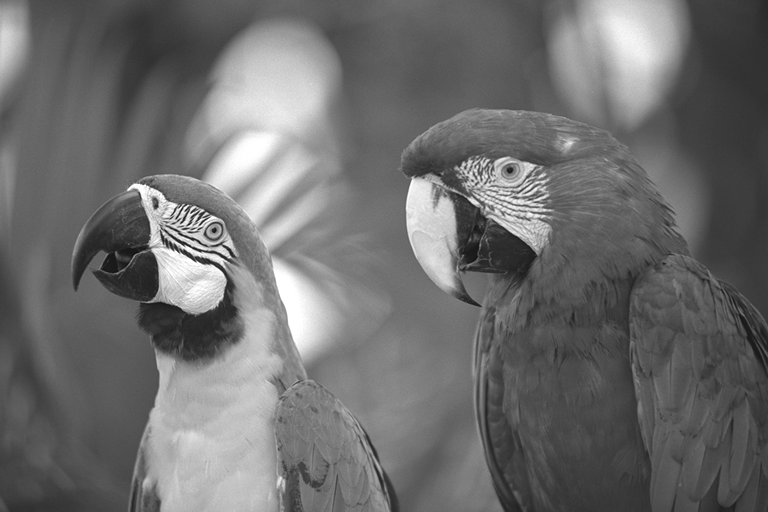

{'role': 'assistant', 'content': '앵무새'}


147

In [ ]:
import gc
from PIL import Image
import urllib.request
from transformers import pipeline
from transformers.image_utils import load_image

from typing import List, Optional, Union, Dict, Any, Callable
from transformers.processing_utils import Unpack
from transformers.image_utils import ImageInput
from transformers.feature_extraction_utils import BatchFeature
from transformers.tokenization_utils_base import AddedToken, PreTokenizedInput, TextInput
from transformers.models.paligemma.processing_paligemma import PaliGemmaProcessorKwargs
from transformers.utils import TensorType
from transformers.tokenization_utils_base import BatchEncoding

from langchain_huggingface.llms import HuggingFacePipeline
from transformers import (
    PaliGemmaProcessor,
    PaliGemmaForConditionalGeneration,
    AutoTokenizer
)

class IT2T_Processor(PaliGemmaProcessor):
    def __init__(
        self,
        image_processor=None,
        tokenizer=None,
        chat_template=None,
        **kwargs,
    ):
        super().__init__(image_processor, tokenizer, chat_template=chat_template, **kwargs)
        self.chat_template = AutoTokenizer.from_pretrained("google/gemma-2-2b-it").chat_template

    def apply_chat_template(
        self,
        conversation: Union[List[Dict[str, str]]],
        chat_template: Optional[str] = None,
        tokenize: bool = False,
        **kwargs,
    ) -> Union[str, List[int], List[str], List[List[int]], BatchEncoding]:
        print(conversation)
        for turn in conversation:
            turn["content"] = [c["text"] for c in turn["content"] if c["type"]=="text"][-1]

        print(conversation)
        return super().apply_chat_template(
            conversation,
            chat_template,
            tokenize,
            **kwargs,
        )

processor = IT2T_Processor.from_pretrained(
    pretrained_model_name_or_path="google/paligemma2-3b-pt-224",
    )
pipe = pipeline(
    task="image-text-to-text",
    model="google/paligemma2-3b-pt-224",
    model_kwargs={
        "low_cpu_mem_usage": True,
    },
    processor=processor,
    trust_remote_code=True,
    max_new_tokens=512)


# 이미지 URL
url = "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png"

# URL에서 이미지 다운로드 및 임시 파일에 저장
temp_file, _ = urllib.request.urlretrieve(url)

# Pillow를 사용하여 이미지 열기
img = Image.open(temp_file)
# img = load_image(url)

result1 = pipe(
    text=[
        {
            "role": "user",
            "content":[
                {
                    "type": "image",
                    "image": img
                },
                {
                    "type": "text",
                    "text": "<image>caption ko"
                }
            ]
        }
    ],
    return_full_text=True)
display(img)
print(result1[0]["generated_text"][-1])
del pipe, processor
gc.collect()

## PubMED Agent

In [ ]:
from langchain_huggingface import HuggingFaceEndpoint
import os

# repo_id = "microsoft/Phi-3-mini-4k-instruct" # 엔드포인트 불안정
repo_id = "matteogeniaccio/phi-4" # 테스트 중인 엔드포인트
# repo_id = "mistralai/Mistral-Nemo-Instruct-2407" # 가장 안정적인 엔드포인트
# repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1" # 비교적 안정적 + 고성능
# repo_id = "meta-llama/Meta-Llama-3.1-8B-Instruct" # pricing plan 에서 사용 가능
# repo_id = "meta-llama/Meta-Llama-3.1-70B-Instruct"  # pricing plan 에서 사용 가능
# repo_id = "TheBloke/NeuralHermes-2.5-Mistral-7B-GPTQ"
# repo_id = "TheBloke/OpenHermes-2.5-Mistral-7B-GPTQ"
# repo_id = "TheBloke/Falcon-180B-Chat-GPTQ"  # pricing plan 에서 사용 가능
# repo_id = "Qwen/Qwen2-7B-Instruct"
# repo_id = "Qwen/Qwen2-7B-Instruct"
# repo_id = "Intel/neural-chat-7b-v3-1"
# repo_id = "HuggingFaceH4/zephyr-7b-beta" # 불안정함
# repo_id = "mistralai/Mistral-7B-Instruct-v0.3" # 성능이 낮음
# repo_id = "meta-llama/Meta-Llama-3-8B-Instruct" # 성능이 낮음
# repo_id = "google/gemma-2-2b-it" # 엔드포인트 불안정 + 낮은 성능
# repo_id = "google/gemma-2-27b-it" # 엔드포인트 불안정
# repo_id = "01-ai/Yi-1.5-34B-Chat"
# repo_id = "NousResearch/Nous-Hermes-2-Mixtral-8x7B-DPO" # 낮은 한글 성능

# repo_id = "HuggingFaceH4/starchat2-15b-v0.1" # code generator
# repo_id = "codellama/CodeLlama-7b-hf" # code generator
# repo_id = "bigcode/starcoder" # code generator

def get_llm(repo_id: str, **kwargs):
    return HuggingFaceEndpoint(
        repo_id=repo_id,  # 모델 저장소 ID를 지정합니다.
        task="text-generation",
        **kwargs)

repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1" # Gunulhona/Llama-Agent-Merge
en_llm = get_llm(
    repo_id=repo_id,
    **{
        "max_new_tokens": 1024,  # 생성할 최대 토큰 길이를 설정합니다.
        "temperature": 0.2,
        "do_sample": True,
        "timeout": 30,
        "stop_sequences": ["</s>", "<|llm_end|>"],
        "huggingfacehub_api_token": os.environ["HF_WRITE_TOKEN"],  # 허깅페이스 토큰
    })

repo_id = "01-ai/Yi-1.5-34B-Chat"
ch_llm = get_llm(
    repo_id=repo_id,
    **{
        "max_new_tokens": 1024,  # 생성할 최대 토큰 길이를 설정합니다.
        "temperature": 0.8,
        "do_sample": True,
        "timeout": 30,
        "stop_sequences": ["</s>", "<|llm_end|>"],
        "huggingfacehub_api_token": os.environ["HF_WRITE_TOKEN"],  # 허깅페이스 토큰
    })


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
import os
import sys
import datetime
import random
import time
import json
from tqdm.auto import tqdm
from crewai import Agent, Task, Crew, Process, Pipeline
from crewai_tools import (SerperDevTool, ScrapeWebsiteTool, DallETool,
                          WebsiteSearchTool, SeleniumScrapingTool, tool)
from crewai_tools.tools.base_tool import BaseTool as CrewBaseTool
from crewai.tasks.task_output import TaskOutput
from crewai.tasks.conditional_task import ConditionalTask

from langchain_huggingface import HuggingFaceEndpoint
from langchain_community.tools import (WikipediaQueryRun, PubmedQueryRun,
                                       YouTubeSearchTool, OpenWeatherMapQueryRun)
from langchain_community.utilities import SearxSearchWrapper

from langchain_community.tools.google_scholar import GoogleScholarQueryRun
from langchain_community.utilities.google_scholar import GoogleScholarAPIWrapper
from langchain_community.tools import DuckDuckGoSearchRun, SearxSearchRun
from langchain_community.agent_toolkits.jira.toolkit import JiraToolkit
from langchain_community.agent_toolkits.github.toolkit import GitHubToolkit
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.tools.google_trends.tool import GoogleTrendsQueryRun
from langchain_community.utilities.google_trends import GoogleTrendsAPIWrapper
from langchain.llms import Ollama
from langchain.tools import BaseTool
from langchain.tools import BaseTool as LangBaseTool
from pytrends.request import TrendReq


from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
import chromedriver_autoinstaller  # setup chrome options
import google_colab_selenium as gs

import pandas as pd
from pytrends.request import TrendReq
from pydantic import BaseModel, Field

from typing import Any, Optional, Type
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

from pydantic import BaseModel, field_validator


class CrewQuery(BaseModel):
    query: str = Field(...)

class CrewQuery(BaseModel):
    query: str = Field(...)

    @field_validator("query", mode="before")
    @classmethod
    def dict_to_str(cls, v) -> str:
        print(v)
        if isinstance(v, dict):
            if "query" in v:
                v = v["query"]
        return str(v["title"]) if isinstance(v, dict) else str(v)

class QueryProcessor(CrewBaseTool):
    runnable_tool: LangBaseTool | CrewBaseTool

    def _check_query(self, query: str) -> bool:
        if isinstance(query, dict):
            if "query" in query:
                if isinstance(query["query"], dict):
                    if "title" in query["query"]:
                        query["query"] = query["query"]["title"]

    def __call__(self, *args, **kwargs) -> Any:
        print(100)
        return self.run(*args, **kwargs)

    def _run(self, query:str, callbacks=None, *args, **kwargs) -> Any:
        print(f"Using Tool: {self.name}")
        print(type(query), query)
        return self.runnable_tool.run(query)

class PubmedTool(QueryProcessor):
    runnable_tool: LangBaseTool | CrewBaseTool = PubmedQueryRun()
    name: str = runnable_tool.name
    description: str = runnable_tool.description
    args_schema: Type[BaseModel] = CrewQuery

class ArxivTool(QueryProcessor):
    runnable_tool: LangBaseTool | CrewBaseTool = ArxivQueryRun()
    name: str = runnable_tool.name
    description: str = runnable_tool.description
    args_schema: Type[BaseModel] = CrewQuery

class WebSearchTool(QueryProcessor):
    runnable_tool: LangBaseTool | CrewBaseTool = DuckDuckGoSearchRun()
    name: str = runnable_tool.name
    description: str= runnable_tool.description
    args_schema: Type[BaseModel] = CrewQuery


agent_tools = [
    #   DuckDuckGoSearchRun(),
    #   ArxivQueryRun(),
      PubmedTool(),
    #   PubmedQueryRun(args_schema=CrewQuery),
    #   YouTubeSearchTool(args_schema=CrewQuery)
    ]

search_agent = Agent(
  role='Search Engine',
  goal='Search for specific treatment effect reports on dental treatment using the agent prompt.',
  backstory="""Find the medical infomations with tools.""",
  verbose=True,
  llm=en_llm, # ollama_openhermes,
  allow_delegation=False,
  tools=agent_tools,
#   agent_executor=[None],
#   tools=agent_tools,
)

summ_agent = Agent(
  role='Summarizer',
  goal='Summarize found document',
  backstory="""Summarize as abstraction, report, short blog etc...""",
  verbose=True,
  llm=ch_llm, # ollama_solar,
  allow_delegation=True,
  tools=agent_tools,
#   agent_executor=[None],
)

team_manager = Agent(
  role='작업 매니저',
  goal='전체 작엄 매니지먼트 전문가',
  backstory="""
크루들 간의 원활한 업무가 진행되도록 관리, 감독합니다.
""",
  verbose=True,
  llm=en_llm, # ollama_solar,
  allow_delegation=True,
#   agent_executor=[None],
)

def callback_function(output: TaskOutput):
    # Do something after the task is completed
    # Example: Send an email to the manager
    print(f"""
        Task completed!
        Task: {output.description}
        Output: {output.raw_output}
    """)

# Create tasks for your agents

def get_current_time_text():
  return datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# 함수를 사용하여 현재 시간을 텍스트로 가져옵니다.
current_time_text = get_current_time_text()

search_task = Task(
  description=f"""
  today is {get_current_time_text()}.
  I need to find medical infomations with detailed surgical procedure
  Topic will updated every step i generate, modified by me.
  Step by step, will update more detail query topic.
  Let's Start Task~
  - start topic : Treatment of an ambush permanent tooth surgical procedure
""",
  expected_output='infomation',
  allow_delegation=False,
#   output_pydantic=AgentSharedForm,
  agent=search_agent,
  max_iter=1,
)

summ_task = Task(
  description="""
    make summarization of paper
""",
  expected_output='abstract of paper',
  agent=summ_agent,
  allow_delegation=False,
#   output_pydantic=AgentRerunForm,
  max_iter=1,
#   context=[labeling]
)


# Instantiate your crew with a sequential process
transcript_crew = Crew(
  agents=[
      search_agent,
      summ_agent],
  tasks=[
      search_task,
      summ_task],
#   full_output=False,
#   planning=True,
  verbose=True, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
  process=Process.sequential, # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
#   manager_agent=team_manager,
#   planning_llm=en_llm,
)

# output_crew = Crew(
#   agents=[ labeler,],
#   tasks=[making_data],
#   verbose=False, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
#   process=Process.sequential # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
# )

# pipeline = Pipeline(
#     stages=[label_crew, output_crew]
# )

# # Get your crew to work!
# result = await pipeline.process_single_kickoff(
#     dict(
#         topic="서울의 봄"
#     )
# )

sentence_list = [
    # "음, 그건 꽤 흥미로운 주제네요. 제 견해로는 맥스웰 방정식이 양자전기역학의 고전적 극한으로 해석될 수 있다고 봅니다. 특히 광자의 개념을 도입하면 두 이론 간의 연결고리가 더 명확해지죠.",
    "대칭적인 형태로 이렇게 제작이 될 거고, 위 턱의 어금니쪽 같은 경우는 광대뼈 안쪽에 상악동이라고 하는 공기주머니가 있어요. "
    # "아 진짜 아무것도 아니야. 그냥 넘어가.",
    # "주말에는 좀 그렇고... 다음 주 수요일은 어때?",
]

filename = "your_model.pkl"
# train model in process
# try:
#     transcript_crew.train(
#         n_iterations=3,
#         inputs={"sentence": random.choice(sentence_list)},
#         filename=filename)
# except Exception as e:
#     raise Exception(f"An error occurred while training the crew: {e}")


result = await transcript_crew.kickoff_async(
    # inputs=dict(
    #     sentence=random.choice(sentence_list)
    # )
)

print("######################")
print(result)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
 [2024-10-18 00:37:26][DEBUG]: == Working Agent: Search Engine
 [2024-10-18 00:37:26][INFO]: == Starting Task: 
  today is 2024-10-18 00:37:26.
  I need to find medical infomations with detailed surgical procedure
  Topic will updated every step i generate, modified by me.
  Step by step, will update more detail query topic.
  Let's Start Task~
  - start topic : Treatment of an ambush permanent tooth surgical procedure



> Entering new CrewAgentExecutor chain...
To find the treatment effect reports on dental treatment, I should look for articles related to the surgical procedure of an ambush permanent tooth. I will use the PubMed tool to search for relevant articles.

Action: pub_med

Action Input: {
  'query': {
    'title': 'Treatment of an ambush permanent tooth surgical procedure'
  }
}


In [ ]:
PubmedQueryRun().invoke("AAS")
# ArxivQueryRun().run({"query":"AAS"})

"PubMed exception: 'webenv'"

In [ ]:
DuckDuckGoSearchRun().run("Treatment of ADHD")


"Treatment recommendations By Age Group. For children with ADHD younger than 6 years of age, the American Academy of Pediatrics (AAP) recommends parent training in behavior management as the first line of treatment, before medication is tried. For children 6 years of age and older, the recommendations include medication and behavior therapy together—parent training in behavior management for ... Treatment recommendations. The AAP guidelines for treatment of ADHD 1 recommend that. Children and adolescents with ADHD should be treated the same as would any other child or adolescent with special healthcare needs, following the principles of the chronic care model and the medical home. ADHD care providers and treatment services Outpatient clinical care. Healthcare claims data from Medicaid or employer-sponsored insurance plans (also known as private insurance) show that 2. Primary care physicians, such as family practice and internal medicine doctors, are the main source of care for adults 

In [ ]:
from langchain_community.utilities.arxiv import ArxivAPIWrapper
from pydantic import field_validator
from crewai_tools.tools.base_tool import BaseTool as CrewBaseTool
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain.tools import BaseTool as LangBaseTool
from langchain.agents import Tool


class CrewQuery(BaseModel):
    query: str = Field(...)

    @field_validator("query", mode="before")
    @classmethod
    def dict_to_str(cls, v) -> str:
        print(v)
        if isinstance(v, dict):
            if "query" in v:
                v = v["query"]
        return str(v["title"]) if isinstance(v, dict) else str(v)

class QueryProcessor(CrewBaseTool):
    runnable_tool: LangBaseTool | CrewBaseTool

    def _check_query(self, query: str) -> bool:
        if isinstance(query, dict):
            if "query" in query:
                if isinstance(query["query"], dict):
                    if "title" in query["query"]:
                        query["query"] = query["query"]["title"]

    def __call__(self, *args, **kwargs) -> Any:
        print(100)
        return self.run(*args, **kwargs)

    def _run(self, query:str, callbacks=None, *args, **kwargs) -> Any:
        print(f"Using Tool: {self.name}")
        print(type(query), query)
        return self.runnable_tool.run(query)

class PubmedTool(QueryProcessor):
    runnable_tool: LangBaseTool | CrewBaseTool = PubmedQueryRun()
    name: str = runnable_tool.name
    description: str = runnable_tool.description
    args_schema: Type[BaseModel] = CrewQuery

class ArxivTool(QueryProcessor):
    runnable_tool: LangBaseTool | CrewBaseTool = ArxivQueryRun()
    name: str = runnable_tool.name
    description: str = runnable_tool.description
    args_schema: Type[BaseModel] = CrewQuery

class WebSearchTool(QueryProcessor):
    runnable_tool: LangBaseTool | CrewBaseTool = DuckDuckGoSearchRun()
    name: str = runnable_tool.name
    description: str= runnable_tool.description
    args_schema: Type[BaseModel] = CrewQuery


class CustomArxivQueryRun(CrewBaseTool):
    name: str = "arxiv"
    description: str = (
        "A wrapper around Arxiv.org "
        "Useful for when you need to answer questions about Physics, Mathematics, "
        "Computer Science, Quantitative Biology, Quantitative Finance, Statistics, "
        "Electrical Engineering, and Economics "
        "from scientific articles on arxiv.org. "
        "Input should be a search query."
    )
    query_run: ArxivQueryRun = Field(default_factory=ArxivQueryRun)  # type: ignore[arg-type]
    args_schema: Type[BaseModel]  = CrewQuery

    def __call__(self, *args, **kwargs):
        self.run(*args, **kwargs)

    def _run(self, query:str, callbacks=None, *args, **kwargs):
        return self.query_run.run(query)


papper = ArxivQueryRun()

papper_tool = Tool(
    name="Arxiv",
    func=papper.run,
    description=(
        "A wrapper around Arxiv.org "
        "Useful for when you need to answer questions about Physics, Mathematics, "
        "Computer Science, Quantitative Biology, Quantitative Finance, Statistics, "
        "Electrical Engineering, and Economics "
        "from scientific articles on arxiv.org. "
        "Input should be a search query."
    )
)


agent_tools = [
    #   DuckDuckGoSearchRun(),
    # CustomArxivQueryRun(),
    # WebSearchTool(),
    PubmedTool(),
    #   PubmedQueryRun(args_schema=CrewQuery),
    #   YouTubeSearchTool(args_schema=CrewQuery)
    ]

search_agent = Agent(
  role='Search Engine',
  goal='Search for sota paper using the agent prompt.',
  backstory="""Find the Computer Science infomations with tools.""",
  verbose=True,
  llm=en_llm, # ollama_openhermes,
  allow_delegation=False,
  tools=agent_tools,
#   agent_executor=[None],
#   tools=agent_tools,
)

summ_agent = Agent(
  role='Summarizer',
  goal='Summarize found document',
  backstory="""Summarize as abstraction, report, short blog etc...""",
  verbose=True,
  llm=ch_llm, # ollama_solar,
  allow_delegation=True,
  tools=agent_tools,
#   agent_executor=[None],
)

team_manager = Agent(
  role='작업 매니저',
  goal='전체 작엄 매니지먼트 전문가',
  backstory="""
크루들 간의 원활한 업무가 진행되도록 관리, 감독합니다.
할루시네이션과 오탈자를 관리합니다
""",
  verbose=True,
  llm=en_llm, # ollama_solar,
  allow_delegation=True,
#   agent_executor=[None],
)

def callback_function(output: TaskOutput):
    # Do something after the task is completed
    # Example: Send an email to the manager
    print(f"""
        Task completed!
        Task: {output.description}
        Output: {output.raw_output}
    """)

# Create tasks for your agents

def get_current_time_text():
  return datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# 함수를 사용하여 현재 시간을 텍스트로 가져옵니다.
current_time_text = get_current_time_text()

search_task = Task(
  description=f"""
    today is {get_current_time_text()}.
    I need to find the novel computer science research papers.
    Topic will updated every step i generate, modified by me.
    Step by step, will update more detail query topic.
    The final answer would be the results from "final topic".
    * start topic : Ideas to search query.
    * reasoning topic : reasoning procedure
    * final topic : Specific research for start topic.

    Let's get bounce~
    - start topic : LLM training
""",
  expected_output='infomation',
  allow_delegation=False,
#   output_pydantic=AgentSharedForm,
  agent=search_agent,
  max_iter=1,
)

summ_task = Task(
  description="""
    step 1:
        make bullet point summarization of paper,
        point the research trend context.
        make papper review for korean students.
    step 2:
        this is the thinking list for summarization task.
        - what can i learn from this paper?
        - what should i read next?
        - what will korean students learn from this paper?
        - how could korean students understand more easily?
        make summary with bullet point with my own thought from given thinking list.

    Let's get bounce~
""",
  expected_output='abstract of paper',
  agent=summ_agent,
  allow_delegation=False,
#   output_pydantic=AgentRerunForm,
  max_iter=1,
#   context=[labeling]
)


# Instantiate your crew with a sequential process
transcript_crew = Crew(
  agents=[
      search_agent,
      summ_agent],
  tasks=[
      search_task,
      summ_task],
#   full_output=False,
#   planning=True,
  verbose=True, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
  process=Process.sequential, # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
  manager_agent=team_manager,
#   planning_llm=en_llm,
)

sentence_list = [
    # "음, 그건 꽤 흥미로운 주제네요. 제 견해로는 맥스웰 방정식이 양자전기역학의 고전적 극한으로 해석될 수 있다고 봅니다. 특히 광자의 개념을 도입하면 두 이론 간의 연결고리가 더 명확해지죠.",
    "대칭적인 형태로 이렇게 제작이 될 거고, 위 턱의 어금니쪽 같은 경우는 광대뼈 안쪽에 상악동이라고 하는 공기주머니가 있어요. "
    # "아 진짜 아무것도 아니야. 그냥 넘어가.",
    # "주말에는 좀 그렇고... 다음 주 수요일은 어때?",
]

filename = "your_model.pkl"
# train model in process
# try:
#     transcript_crew.train(
#         n_iterations=3,
#         inputs={"sentence": random.choice(sentence_list)},
#         filename=filename)
# except Exception as e:
#     raise Exception(f"An error occurred while training the crew: {e}")


result = await transcript_crew.kickoff_async()

print("######################")
print(result)

 [2024-10-17 06:18:17][DEBUG]: == Working Agent: Search Engine
 [2024-10-17 06:18:17][INFO]: == Starting Task: 
    today is 2024-10-17 06:18:17.
    I need to find the novel computer science research papers.
    Topic will updated every step i generate, modified by me.
    Step by step, will update more detail query topic.
    The final answer would be the results from "final topic".
    * start topic : Ideas to search query.
    * reasoning topic : reasoning procedure
    * final topic : Specific research for start topic.
  
    Let's get bounce~
    - start topic : LLM training



> Entering new CrewAgentExecutor chain...


CancelledError: 

## Autogen Procedure

In [ ]:
import os
from hfautogen import ModelAgent, UserAgent, InitChat
import autogen
from autogen.cache import Cache
import httpx


# HuggingFace API 키 설정
repo_id = "mistralai/Mistral-Nemo-Instruct-2407"
repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
hf_url = f"https://api-inference.huggingface.co/models/{repo_id}"


class HttpXClient(httpx.Client):
    def __deepcopy__(self, memo):
        return self

# Configuration for the AI models

config_list = [
    # {
    #     'model': 'gpt-4',
    #     'api_key': 'your-api-key-here'
    # },
    {
        "model": "mistralai/Mistral-Nemo-Instruct-2407",
        # "bearer": os.environ["HF_WRITE_TOKEN"],
        "base_url": hf_url,
        "http_client": HttpXClient(
            proxy=hf_url,
            headers={
                        "authorization": f"Bearer {os.environ['HF_WRITE_TOKEN']}",
                        "content-type": "application/json",
                },),
        "api_key": "",
        "tags": ["hf", "local"]
        # "api_key": os.environ["HF_WRITE_TOKEN"]
    }
]

# Create assistant agents
# patient = autogen.AssistantAgent(
#     name="Patient",
#     system_message="You are a patient visiting a doctor. You have a sore throat and mild fever for the past 3 days.",
#     llm_config={"config_list": config_list}
# )
patient = ModelAgent(
    name="Patient",
    system_message="You are a patient visiting a doctor. You have a sore throat and mild fever for the past 3 days.",
    hf_key=os.environ["HF_WRITE_TOKEN"],)

# doctor = autogen.AssistantAgent(
#     name="Doctor",
#     system_message="You are a medical doctor. Conduct a proper medical consultation with the patient.",
#     llm_config={"config_list": config_list}
# )
doctor = ModelAgent(
    name="Doctor",
    system_message="You are a medical doctor. Conduct a proper medical consultation with the patient.",
    hf_key=os.environ["HF_WRITE_TOKEN"],)

# summarizer = autogen.AssistantAgent(
#     name="Summarizer",
#     system_message="You are a medical assistant. Summarize the conversation between the patient and doctor into a formal medical record.",
#     llm_config={"config_list": config_list}
# )
summurizer = ModelAgent(
    name="Summarizer",
    system_message="You are a medical assistant. Summarize the conversation between the patient and doctor into a formal medical record.",
    hf_key=os.environ["HF_WRITE_TOKEN"],)

# human = autogen.UserProxyAgent(
#     name="Human",
#     human_input_mode="TERMINATE",
#     max_consecutive_auto_reply=10,
#     is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("CONSULTATION_END"),
#     code_execution_config={"work_dir": "coding"},
# )
human = UserAgent(
    name="user_proxy",
    hf_key=os.environ["HF_WRITE_TOKEN"])

if "patient" in locals():
    patient.reset()
    patient.clear_history()
if "doctor" in locals():
    doctor.reset()
    doctor.clear_history()
if "summurizer" in locals():
    summurizer.reset()
    summurizer.clear_history()
if "human" in locals():
    human.reset()
    human.clear_history()

reflection_assistant = ModelAgent(
    name="reflection_assistant",
    system_message="Generate critique and recommendations on the writing. Provide detailed recommendations, including requests for length, depth, style, etc..",
    hf_key=os.environ["HF_WRITE_TOKEN"])

def reflection_message(recipient, messages, sender, config):
    print("Reflecting...")
    return f"Reflect and provide critique on the following writing. \n\n {recipient.chat_messages_for_summary(sender)[-1]['content']}"

nested_chat_queue = [
    {
        "recipient": reflection_assistant,
        "message": reflection_message,
        "max_turns": 1,
    },
]

if isinstance(human, autogen.UserProxyAgent):
    human.register_nested_chats(
        nested_chat_queue,
        trigger=patient,
        # position=4,
    )

with Cache.disk(cache_seed=42) as cache:
    # Start the conversation
    human.initiate_chat(
        patient,
        message="Hello, I'm not feeling well. Can you describe your symptoms to the doctor?",
        clear_history=True,
        cache=cache
    )
    # Continue the conversation between patient and doctor
    patient.send(
        doctor,
        "Hello doctor, I've been having a sore throat and mild fever for the past 3 days.",
    )
    # Let the conversation continue until termination
    while True:
        last_message = doctor.last_message()
        if "CONSULTATION_END" in last_message.get("content", ""):
            break
        human.send(patient, "Continue the consultation.")
        patient.send(doctor, "What else would you like to know, doctor?")
    # Summarize the conversation
    conversation_history = human.chat_messages[patient]
    summarizer.send(
        human,
        f"Please summarize the following doctor-patient conversation into a formal medical record:\n\n{conversation_history}",
    )
    # Print the summary
    print(human.last_message()["content"])

def format_medical_record(summary):
    template = """
    Medical Consultation Record
    ==========================
    Date: [Current Date]

    Patient Information:
    -------------------
    Name: [Patient Name]
    Age: [Patient Age]
    Gender: [Patient Gender]

    Chief Complaint:
    ---------------
    [Main reason for visit]

    History of Present Illness:
    --------------------------
    [Detailed description of the current health issue]

    Physical Examination:
    --------------------
    [Findings from the doctor's examination]

    Assessment:
    ----------
    [Doctor's diagnosis or impression]

    Plan:
    ----
    [Treatment plan, prescriptions, follow-up instructions]

    Doctor's Signature: ____________________
    """

    # Here you would parse the summary and fill in the template
    # For demonstration, we'll just return the template
    return template

formatted_record = format_medical_record(human.last_message()["content"])
print(formatted_record)

[autogen.oai.client: 09-12 08:22:47] {399} INFO - Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


INFO:autogen.oai.client:Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


[autogen.oai.client: 09-12 08:22:47] {399} INFO - Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


INFO:autogen.oai.client:Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


[autogen.oai.client: 09-12 08:22:47] {399} INFO - Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


INFO:autogen.oai.client:Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


[autogen.oai.client: 09-12 08:22:47] {399} INFO - Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


INFO:autogen.oai.client:Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


[autogen.oai.client: 09-12 08:22:47] {399} INFO - Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


INFO:autogen.oai.client:Detected custom model client in config: APIModelClientWithArguments, model client can not be used until register_model_client is called.


AttributeError: 'UserProxyAgent' object has no attribute 'register_nested_chats'

# Ollama Crew

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to render group...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
!huggingface-cli download \
	heegyu/EEVE-Korean-Instruct-10.8B-v1.0-GGUF \
	ggml-model-Q5_K_M.gguf \
	--local-dir /content/eeve_model \
	--local-dir-use-symlinks False

/usr/local/lib/python3.10/dist-packages/huggingface_hub/commands/download.py:132: FutureWarning: Ignoring --local-dir-use-symlinks. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
ggml-model-Q5_K_M.gguf: 100% 7.65G/7.65G [01:44<00:00, 73.1MB/s]
Download complete. Moving file to /content/eeve_model/ggml-model-Q5_K_M.gguf
/content/eeve_model/ggml-model-Q5_K_M.gguf


In [ ]:
%%writefile eeve_model/Modelfile
FROM ggul-model-Q5_K_M.gguf

TEMPLATE """{{- if .System}}
<s>{{ .System}}</s>
{{- end}}
<s>Human:
{{ .Prompt }}</s>
<s>Assistant:
"""

SYSTEM """A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's question."""

TEMPERATURE 0
PARAMETER stop <s>
PARAMETER stop </s>

Overwriting eeve_model/Modelfile


In [ ]:
!cd eeve_model && ollama create EEVE-Korean-10.8B -f Modelfile
!cd eeve_model && ollama pull EEVE-Korean-10.8B:latest
!cd eeve_model && ollama run qwen2.5:latest

Error: command must be one of "from", "license", "template", "system", "adapter", "parameter", or "message"
pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest 
Error: pull model manifest: file does not exist
pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest 
pulling 2bada8a74506...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 2bada8a74506...   0% ▕▏  60 KB/4.7 GB                  pulling manifest 
pulling 2bada8a74506...   0% ▕▏ 792 KB/4.7 GB                  pulling manifest 
pulling 2bada8a74506...   0% ▕▏  12 MB/4.7 GB                  pulling manifest 
pulling 2bada8a74506...   0% ▕▏  14 MB/4.7 GB                  pulling manifest 
pulling 2bada8a74506...   1% ▕▏  25 MB/4.7 GB                  pulling manifest 
pulling 2bada8a745

In [ ]:
from langchain_community.llms import Ollama
from crewai import Agent, Task, Crew, Process, Pipeline
from textwrap import dedent

EEVE = Ollama(model = "qwen2.5")

my_agent = Agent(role="Expert Travel Agent",
    backstory=dedent(
        f"""Expert in travel planning and logistics.
        I have decades of expereince making travel iteneraries."""),
    goal=dedent(f"""
        Create a 7-day travel itinerary with detailed per-day plans,
        include budget, packing suggestions, and safety tips.
        """),
    tools=[
        # SearchTools.search_internet,
        # CalculatorTools.calculate
            ],
    verbose=True,
    # llm=self.OpenAIGPT4,
    llm=EEVE
    )

In [ ]:
ollama_task = Task(
  description="""
대화를 보고 문서 작성을 진행합니다.
""",
  expected_output='markdown',
  agent=my_agent,
)

# Instantiate your crew with a sequential process
ollama_crew = Crew(
  agents=[my_agent],
  tasks=[ollama_task],
  verbose=True, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
  process=Process.sequential # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
)

result = await ollama_crew.kickoff_async()

 [2024-09-23 06:54:28][DEBUG]: == Working Agent: Expert Travel Agent
 [2024-09-23 06:54:28][INFO]: == Starting Task: 
대화를 보고 문서 작성을 진행합니다.



> Entering new CrewAgentExecutor chain...
Final Answer:
```markdown
# 7-Day Travel Itinerary for Seoul, South Korea

## Day 1: Arrival in Seoul - Exploring the City
- **Morning:** Arrive at Incheon International Airport. Take a taxi or use a pre-booked ride service to your accommodation (around 1 hour). Check-in and rest.
- **Afternoon:** Explore Myeong-dong shopping district for some last-minute souvenirs and fashion items.
- **Evening:** Dine at a traditional Korean restaurant, such as Jungsik. Try Korean dishes like bibimbap, bulgogi, and samgyetang.

### Budget: 
- Flight: Approximately $500 (USD)
- Accommodation: About $120 (USD) per night
- Meals: Around $30 (USD) each

### Packing Suggestions:
- Comfortable walking shoes
- Formal wear for dinner
- Raincoat or umbrella
- Camera and chargers

### Safety Tips:
- Keep valuables secure in your 

# Crew Project

In [ ]:
%%writefile config/tasks.yaml
research_candidates_task:
  description: >
    Conduct thorough research to find potential candidates for the specified job.
    Utilize various online resources and databases to gather a comprehensive list of potential candidates.
    Ensure that the candidates meet the job requirements provided.

    Job Requirements:
    {job_requirements}
  expected_output: >
    A list of 10 potential candidates with their contact information and brief profiles highlighting their suitability.

match_and_score_candidates_task:
  description: >
    Evaluate and match the candidates to the best job positions based on their qualifications and suitability.
    Score each candidate to reflect their alignment with the job requirements, ensuring a fair and transparent assessment process.
    Don't try to scrape people's linkedin, since you don't have access to it.

    Job Requirements:
    {job_requirements}
  expected_output: >
    A ranked list of candidates with detailed scores and justifications for each job position.

outreach_strategy_task:
  description: >
    Develop a comprehensive strategy to reach out to the selected candidates.
    Create effective outreach methods and templates that can engage the candidates and encourage them to consider the job opportunity.

    Job Requirements:
    {job_requirements}
  expected_output: >
    A detailed list of outreach methods and templates ready for implementation, including communication strategies and engagement tactics.

report_candidates_task:
  description: >
    Compile a comprehensive report for recruiters on the best candidates to put forward.
    Summarize the findings from the previous tasks and provide clear recommendations based on the job requirements.
  expected_output: >
    A detailed report with the best candidates to pursue, no need to include the job requirements formatted as markdown without '```', including profiles, scores, and outreach strategies.

Writing config/tasks.yaml


In [ ]:
%%writefile config/agents.yaml
researcher:
  role: >
    Job Candidate Researcher
  goal: >
    Find potential candidates for the job
  backstory: >
    You are adept at finding the right candidates by exploring various online
    resources. Your skill in identifying suitable candidates ensures the best
    match for job positions.

matcher:
  role: >
    Candidate Matcher and Scorer
  goal: >
    Match the candidates to the best jobs and score them
  backstory: >
    You have a knack for matching the right candidates to the right job positions
    using advanced algorithms and scoring techniques. Your scores help
    prioritize the best candidates for outreach.

communicator:
  role: >
    Candidate Outreach Strategist
  goal: >
    Develop outreach strategies for the selected candidates
  backstory: >
    You are skilled at creating effective outreach strategies and templates to
    engage candidates. Your communication tactics ensure high response rates
    from potential candidates.

reporter:
  role: >
    Candidate Reporting Specialist
  goal: >
    Report the best candidates to the recruiters
  backstory: >
    You are proficient at compiling and presenting detailed reports for recruiters.
    Your reports provide clear insights into the best candidates to pursue.

Writing config/agents.yaml


In [ ]:
%%writefile test_crew.py
from crewai import Agent, Crew, Process, Task
from crewai.project import CrewBase, agent, crew, task
from crewai_tools import SerperDevTool, ScrapeWebsiteTool
# from recruitment.tools.linkedin import LinkedInTool


@CrewBase
class RecruitmentCrew():
    """Recruitment crew"""
    agents_config = 'config/agents.yaml'
    tasks_config = 'config/tasks.yaml'

    @agent
    def researcher(self) -> Agent:
        return Agent(
            config=self.agents_config['researcher'],
						# tools=[SerperDevTool(), ScrapeWebsiteTool(), LinkedInTool()],
            allow_delegation=False,
						verbose=True
        )

    @agent
    def matcher(self) -> Agent:
        return Agent(
            config=self.agents_config['matcher'],
            # tools=[SerperDevTool(), ScrapeWebsiteTool()],
            allow_delegation=False,
						verbose=True
        )

    @agent
    def communicator(self) -> Agent:
        return Agent(
            config=self.agents_config['communicator'],
            # tools=[SerperDevTool(), ScrapeWebsiteTool()],
            allow_delegation=False,
						verbose=True
        )

    @agent
    def reporter(self) -> Agent:
        return Agent(
            config=self.agents_config['reporter'],
            allow_delegation=False,
						verbose=True
        )

    @task
    def research_candidates_task(self) -> Task:
        return Task(
            config=self.tasks_config['research_candidates_task'],
            agent=self.researcher()
        )

    @task
    def match_and_score_candidates_task(self) -> Task:
        return Task(
            config=self.tasks_config['match_and_score_candidates_task'],
            agent=self.matcher()
        )

    @task
    def outreach_strategy_task(self) -> Task:
        return Task(
            config=self.tasks_config['outreach_strategy_task'],
            agent=self.communicator()
        )

    @task
    def report_candidates_task(self) -> Task:
        return Task(
            config=self.tasks_config['report_candidates_task'],
            agent=self.reporter(),
            context=[self.research_candidates_task(), self.match_and_score_candidates_task(), self.outreach_strategy_task()],
        )

    @crew
    def crew(self) -> Crew:
        """Creates the Recruitment crew"""
        return Crew(
            agents=self.agents,
            tasks=self.tasks,
            process=Process.sequential,
            verbose=2,
        )

def run():
    # Replace with your inputs, it will automatically interpolate any tasks and agents information
    inputs = {
        'job_requirements': """
        job_requirement:
  title: >
    Ruby on Rails and React Engineer
  description: >
    We are seeking a skilled Ruby on Rails and React engineer to join our team.
    The ideal candidate will have experience in both backend and frontend development,
    with a passion for building high-quality web applications.

  responsibilities: >
    - Develop and maintain web applications using Ruby on Rails and React.
    - Collaborate with teams to define and implement new features.
    - Write clean, maintainable, and efficient code.
    - Ensure application performance and responsiveness.
    - Identify and resolve bottlenecks and bugs.

  requirements: >
    - Proven experience with Ruby on Rails and React.
    - Strong understanding of object-oriented programming.
    - Proficiency with JavaScript, HTML, CSS, and React.
    - Experience with SQL or NoSQL databases.
    - Familiarity with code versioning tools, such as Git.

  preferred_qualifications: >
    - Experience with cloud services (AWS, Google Cloud, or Azure).
    - Familiarity with Docker and Kubernetes.
    - Knowledge of GraphQL.
    - Bachelor's degree in Computer Science or a related field.

  perks_and_benefits: >
    - Competitive salary and bonuses.
    - Health, dental, and vision insurance.
    - Flexible working hours and remote work options.
    - Professional development opportunities.
        """
    }
    RecruitmentCrew().crew().kickoff(inputs=inputs)

def train():
    """
    Train the crew for a given number of iterations.
    """
    inputs = {
        'job_requirements': """
        job_requirement:
  title: >
    Ruby on Rails and React Engineer
  description: >
    We are seeking a skilled Ruby on Rails and React engineer to join our team.
    The ideal candidate will have experience in both backend and frontend development,
    with a passion for building high-quality web applications.

  responsibilities: >
    - Develop and maintain web applications using Ruby on Rails and React.
    - Collaborate with teams to define and implement new features.
    - Write clean, maintainable, and efficient code.
    - Ensure application performance and responsiveness.
    - Identify and resolve bottlenecks and bugs.

  requirements: >
    - Proven experience with Ruby on Rails and React.
    - Strong understanding of object-oriented programming.
    - Proficiency with JavaScript, HTML, CSS, and React.
    - Experience with SQL or NoSQL databases.
    - Familiarity with code versioning tools, such as Git.

  preferred_qualifications: >
    - Experience with cloud services (AWS, Google Cloud, or Azure).
    - Familiarity with Docker and Kubernetes.
    - Knowledge of GraphQL.
    - Bachelor's degree in Computer Science or a related field.

  perks_and_benefits: >
    - Competitive salary and bonuses.
    - Health, dental, and vision insurance.
    - Flexible working hours and remote work options.
    - Professional development opportunities.
        """
    }
    try:
        RecruitmentCrew().crew().train(n_iterations=int(sys.argv[1]), inputs=inputs)

    except Exception as e:
        raise Exception(f"An error occurred while training the crew: {e}")

Writing test_crew.py
